# Setting Everything Up

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 
from sklearn.feature_extraction.text import CountVectorizer

# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

pd.options.display.float_format = '{:,.0f}'.format

import string

%matplotlib inline

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.3.0      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 1.0.0 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [6]:
#To Download PDFs
from urllib.parse import urljoin

In [7]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [8]:
%%R

library(jpeg)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)


R[write to console]: Loading required package: RColorBrewer

R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘NLP’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    annotate




In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
%%R
library(vistime)
library(shiny)
library(plotly)
#for timeline plotting

R[write to console]: 
Attaching package: ‘plotly’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    last_plot


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: The following object is masked from ‘package:graphics’:

    layout




In [282]:
from collections import Counter


# Books 311 Dataset

#### This is not very helpful but just wanted to add it as background information
#### Perhaps a more accurate iteration will be pulling books_311 df from 311 data json below so though static it can always be recent

Source: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data

Filter for descriptor contains books

In [12]:
df_books_311 = pd.read_excel('books_311.xlsx')

In [13]:
df_books_311

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,BBL,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Open Data Channel Type,Park Facility Name,Park Borough,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,37493222,2017-10-22 20:56:11,2019-02-01 14:54:34,TLC,Taxi and Limousine Commission,Found Property,Book/Stationery,Taxi,"11,211",875 METROPOLITAN AVENUE,METROPOLITAN AVENUE,ORIENT AVENUE,OLIVE STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,NaN,Closed,NaT,See notes for information.,2019-02-01 14:54:34,01 BROOKLYN,"3,029,120,036",BROOKLYN,"1,000,853","199,654",PHONE,Unspecified,BROOKLYN,NaN,NaN,La Guardia Airport,NaN,NaN,NaN,NaN,41,-74,"(40.71466527154591, -73.94010889799512)"
1,39506488,2018-06-19 23:05:38,2018-06-20 08:38:46,TLC,Taxi and Limousine Commission,Found Property,Book/Stationery,Taxi,"11,217",NaN,NaN,FLATBUSH AVENUE,FT GREENE PLACE,NaN,NaN,PLACENAME,BROOKLYN,BARCLAYS CENTER,NaN,Closed,NaT,The Taxi and Limousine Commission will keep a ...,NaT,02 BROOKLYN,"3,011,180,001",BROOKLYN,"991,034","188,046",PHONE,Unspecified,BROOKLYN,NaN,NaN,Grand Central Station,NaN,NaN,NaN,NaN,41,-74,"(40.68281699836376, -73.97554013353896)"
2,41041472,2018-11-26 23:23:00,2019-02-01 13:45:05,TLC,Taxi and Limousine Commission,Found Property,Book/Stationery,NaN,"10,017",888 2 AVENUE,2 AVENUE,EAST 47 STREET,EAST 48 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaT,See notes for information.,2019-02-01 13:45:05,06 MANHATTAN,"1,013,400,001",MANHATTAN,"992,636","213,689",ONLINE,Unspecified,MANHATTAN,NaN,NaN,Other,NaN,NaN,NaN,NaN,41,-74,"(40.75319949386173, -73.96973213960263)"
3,42942282,2019-06-11 15:21:39,2019-06-11 15:34:58,TLC,Taxi and Limousine Commission,Lost Property,Book/Stationery,Taxi,"10,121",NaN,NaN,WEST 32 STREET,WEST 33 STREET,WEST 32 STREET,WEST 33 STREET,PLACENAME,NEW YORK,PENNSYLVANIA STATION,NaN,Closed,NaT,See notes for information.,2019-06-11 19:34:58,05 MANHATTAN,"1,007,810,002",MANHATTAN,"986,437","212,546",UNKNOWN,Unspecified,MANHATTAN,NaN,NaN,WEST 32 STREET ANDWEST 33 STREETMANHATTAN,NaN,NaN,NaN,NaN,41,-74,"(40.75006595421169, -73.9921067617765)"
4,43068684,2019-06-23 13:34:16,2019-06-24 08:38:25,TLC,Taxi and Limousine Commission,Lost Property,Book/Stationery,NaN,"10,003",5 UNIVERSITY PLACE,UNIVERSITY PLACE,WASHINGTON SQUARE NORTH,WASHINGTON MEWS,WASHINGTON SQUARE NORTH,WASHINGTON MEWS,ADDRESS,NEW YORK,NaN,NaN,Closed,2019-06-30 13:34:16,See notes for information.,2019-06-24 12:38:25,02 MANHATTAN,"1,005,480,004",MANHATTAN,"985,535","205,572",ONLINE,Unspecified,MANHATTAN,NaN,NaN,5 UNIVERSITY PLACE MANHATTAN,NaN,NaN,NaN,NaN,41,-74,"(40.73092423524819, -73.99536355851659)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3296,33785450,2016-07-07 05:52:57,2019-02-01 13:44:52,TLC,Taxi and Limousine Commission,Found Property,Book/Stationery,NaN,"11,105",21-78 35 STREET,35 STREET,21 AVENUE,DITMARS BOULEVARD,NaN,NaN,ADDRESS,ASTORIA,NaN,NaN,Closed,NaT,See notes for information.,2019-02-01 13:44:52,01 QUEENS,"4,008,307,501",QUEENS,"1,009,659","221,791",ONLINE,Unspecified,QUEENS,NaN,NaN,Other,NaN,NaN,NaN,NaN,41,-74,"(40.77540484997966, -73.9082598804459)"
3297,34084907,2016-08-14 12:36:11,2019-02-01 14:14:16,TLC,Taxi and Limousine Commission,Found Property,Book/Stationery,NaN,"10,281",250 VESEY STREET,VESEY STREET,NORTH END WAY,NORTH END AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,NaT,See notes for information.,2019-02-01 14:14:16,01 MANHATTAN,"1,000,160,150",MANHATTAN,"979,904","199,599",ONLINE,Unspecified,MANHATTA

# Getting all 311 data

Source: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/data

Get via API

In [14]:
# df_311= pd.read_json('https://data.cityofnewyork.us/resource/erm2-nwe9.json')
# df_311

### The below is as of Tuesday, March 21st 2023 at 3.48p.m.

In [15]:
# df_311.to_csv('df_311.csv')

# For whole 311 dataset

In [16]:
# df_whole_311=pd.read_csv('311_21032023.csv')
# df_whole_311

# Get Library Data

#### Starting with Queens

Source: https://data.cityofnewyork.us/Education/Queens-Library-Branches/kh3d-xhq7

In [17]:
# df_queens_json = pd.read_json('https://data.cityofnewyork.us/resource/kh3d-xhq7.json')
# df_queens_json

# Brooklyn Library

In [18]:
df_brooklyn_lib = pd.read_csv('BPL_Locations.csv')
df_brooklyn_lib.head(5)

,branch,address,phone,position,bus,subway,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,access,tags,path
0,Arlington Library,"203 Arlington Ave. at Warwick St. Brooklyn, NY...",718.277.6105,"40.680456600000, -73.887288700000",Q24;Q56,J,\n10:00am - 6:00pm,\n10:00am - 6:00pm,\n1:00pm - 8:00pm,\n10:00am - 8:00pm,\n10:00am - 6:00pm,\n10:00am - 5:00pm,NaN,Fully accessible,accessible;open now;,https://www.bklynlibrary.org/locations/arlington
1,Bay Ridge Library,"7223 Ridge Blvd. at 73rd St. Brooklyn, NY 11209",718.748.5709,"40.633650700000, -74.029523500000",B4;B9;B64;B70,R,\n10:00am - 6:00pm,\n10:00am - 6:00pm,\n10:00am - 8:00pm,\n1:00pm - 8:00pm,\n10:00am - 6:00pm,\n10:00am - 5:00pm,NaN,Fully accessible,accessible;open now;,https://www.bklynlibrary.org/locations/bay-ridge
2,Bedford Library,"496 Franklin Avenue Brooklyn, NY 11238",718.623.0012,"40.681817000000, -73.956194800000",B25;B26;B48;B49,C;S,\n10:00am - 6:00pm,\n10:00am - 6:00pm,\n1:00pm - 8:00pm,\n10:00am - 8:00pm,\n10:00am - 6:00pm,\n10:00am - 5:00pm,NaN,Fully accessible,accessible;open now;learning center;,https://www.bklynlibrary.org/locations/bedford
3,Borough Park Library,"1265 43rd St. at 13th Ave. Brooklyn, NY 11219",718.437.4085,"40.638920000000, -73.989122700000",B11;B16;B35,D,\n10:00am - 6:00pm,\n10:00am - 8:00pm,\n10:00am - 6:00pm,\n10:00am - 8:00pm,\n10:00am - 6:00pm,NaN,\n1:00pm - 5:00pm,Fully accessible,accessible;open now;book drop;open sundays,https://www.bklynlibrary.org/locations/borough...
4,Brighton Beach Library,16 Brighton First Rd. at Brighton Beach Ave. B...,718.946.2917,"40.576178400000, -73.966799500000",B1;B68,B;Q,\n10:00am - 6:00pm,\n1:00pm - 8:00pm,\n10:00am - 8:00pm,\n10:00am - 6:00pm,\n10:00am - 6:00pm,\n10:00am - 5:00pm,NaN,Fully accessible,accessible;open now;,https://www.bklynlibrary.org/locations/brighto...


In [19]:
# df_bklyn_electronic = pd.read_json('https://www.bklynlibrary.org/learning-resources/json')
# df_bklyn_electronic

#### Brooklyn Library electronic resources

##### In case helpful

In [20]:
# bklyn_elec_url='https://data.cityofnewyork.us/resource/ji82-xba5.json'
# bklyn_elec_raw_html = requests.get(bklyn_elec_url).content
    
# # soup_doc = BeautifulSoup(raw_html, "html.parser")


# bklyn_elec_raw_html
This has a b' in the intro and \n at the end that I need to figure out but since I doubt I will use it I am putting it off for now

# Facilities

In [21]:
# df_facilities_json = pd.read_json('https://data.cityofnewyork.us/resource/ji82-xba5.json')
# df_facilities_json

In [22]:
# df_whole_311['descriptor'].value_counts()


# Banned books in the world

[Source of banned books in the world] (https://en.wikipedia.org/wiki/List_of_books_banned_by_governments) <br/>
Source of books in the world: World Digital Library <br/>
[Source of most_frequently challenged books by decade] (https://www.ala.org/advocacy/bbooks/frequentlychallengedbooks/top100) <br/>
[Source of censorship attacks] (https://www.everylibraryinstitute.org/book_censorship_database_magnusson) <br/>
[Source of censored books in India] (https://en.wikipedia.org/wiki/List_of_books_banned_in_India)
Other online searches for publication dates

In [23]:
#read csvs and excel files

df_digital_books=pd.read_csv('wdl_data_en.csv')

df_digital_books

,wdl_id,title,collection,description,title_in_original_language,wdl_url,handle,Type of Item,Institution,Photographer,Date Created,Subject Date,Place,Dewey Decimal Code,Additional Subjects,Physical Description,Creator,Publisher,Place of Publication,Language,Artist,Cartographer,Note,Delineator,Author,Surveyor,Compiler,Translator,Contributor,Engraver,Cinematographer,Director,Illustrator,Sponsor,Draftsman,Editor,Corrector,Responsible Party,Calligrapher,Interviewee,Interviewer,Associated Name,Printer,Lithographer,Donor,Recording Engineer,Musician,Composer,Architect,References,Attributed Name,Dedicatee,Signer,Copyright Holder,Collector,Printmaker,Copyright claimant,Performer,Owner,Commentator,Etcher,Wood-engraver,Scribe,"Author of Introduction, etc.","Author of Afterword, Colophon, etc.",Scientific advisor,Speaker,Commentator for Written Text,Illuminator,Librettist,Client,Transcriber,Collaborator,Producer,Videographer,Vocalist,Patron,Funder,Annotator,Woodcutter,Designer,Author in Quotations or Text Extracts,Lyricist,Type Designer,Animator,Writer of added text,Project Director,Dubious Author,Censor,Engineer,Lead,Publishing Director,Singer,Binder,Originator,Typographer,Book producer,Narrator,Colorist,Arranger,Recipient,Correspondent
0,1,"Antietam, Maryland. Allan Pinkerton, President...",NaN,"At the outset of the U.S. Civil War, Mathew Br...","Antietam, Maryland. Allan Pinkerton, President...",https://www.wdl.org/en/item/1,https://hdl.loc.gov/loc.wdl/wdl.1,"Prints, Photographs",Library of Congress,"Gardner, Alexander, 1821-1882",1862-10-03,1862-10-03,North America > United States of America > Mar...,973,"Antietam, Battle of, Maryland, 1862|Generals|L...","1 negative : glass, wet collodion",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"Chola Woman, Full-Length Portrait, Standing, F...",Frank and Frances Carpenter Collection,This photograph of a Bolivian woman is from th...,NaN,https://www.wdl.org/en/item/2,https://hdl.loc.gov/loc.wdl/wdl.2,"Prints, Photographs",Library of Congress,"Vargas, Max T., 1874–1959",1911,1900/1923,Latin America and the Caribbean > Bolivia > La...,391,Portrait photographs|Women,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"Maps of Ezo, Sakhalin, and Kuril Islands",NaN,This map was made by Fujita Junsai and publish...,蝦夷闔境輿地全図,https://www.wdl.org/en/item/3,https://hdl.loc.gov/loc.wdl/wdl.3,Maps,Library of Congress,NaN,1854,1854,East Asia > Japan > Hokkaido|Europe > Russian ...,912,NaN,"1 color map, 115 x 92 centimeters, folded in c...","Fujita, Tonsai",Harimaya Katsugorō,Edo,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Warrior Asahina Kobayashi,Japanese Prints and Drawings Collection,The Japanese art of Ukiyo-e (“Pictures of the ...,Kobayashi no Asahina,https://www.wdl.org/en/item/4,https://hdl.loc.gov/loc.wdl/wdl.4,"Prints, Photographs",Library of Congress,NaN,1862,1862,East Asia > Japan,769|792,Actors|Costumes|Japanese drama|Portrait prints...,"1 print: woodcut, color ; 29.0 x 21.3 centimeters",NaN,NaN,NaN,Japanese,"Utagawa, Toyokuni, 1786-1865",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [24]:
xl_book_censorship_attacks=pd.ExcelFile('book_censorship_attacks.xlsx')
xl_book_censorship_attacks.sheet_names

['Books Challenged Schools 21-22',
 'Books Challenge 22-23',
 'New Groups',
 'By School District 21-22',
 'Books Challenged Schools 2020-2',
 'Groups Formed In Response To Th',
 'Books Challenged Public Librari',
 'By Public LIbraries',
 'Other Relevant Articles',
 'Books Targeted By Groups',
 'Groups Formed To Ban Books',
 'KEY',
 'Rep Krause 850 Texas Book List',
 'Krause List By Author',
 'NorthEastISD Texas']

In [25]:
# df_challenged_2122 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenged Schools 21-22')
# df_challenged_2223 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenge 22-23')
# df_new_groups = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='New Groups')
# df_school_district_2122 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='By School District 21-22')
# df_school_district_2021 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenged Schools 2020-2')
# df_challenging_groups = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Groups Formed In Response To Th')
# df_challenged_public_libs = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenged Public Librari')
# df_by_public_libs = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='By Public LIbraries')
# df_relevant_articles = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Other Relevant Articles')
# df_targeted_by_groups = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Targeted By Groups')
# df_groups_to_ban_books = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Groups Formed To Ban Books')
# df_key = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='KEY')
# df_krause_texas_books = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Rep Krause 850 Texas Book List')
# df_krause_texas_author = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Krause List By Author')
# df_northeastISD = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='NorthEastISD Texas')




## Exploring number of books banned in the two most recent years

In [26]:
df_challenged_2223.shape

(2131, 43)

In [27]:
df_challenged_2122.shape

(4023, 16)

In [28]:
df_number_of_books_recent=pd.read_csv('number_of_books_challenged.csv')
df_number_of_books_recent

,Year,number_of_books_banned_or_challenged
0,2021-2022,2131
1,2022-2023,4023


### Here is the resulting chart:
https://www.datawrapper.de/_/Ppfvq/

# Starting exploration of banned books by country
Source: https://en.wikipedia.org/wiki/List_of_books_banned_by_governments

In [29]:
df_banned_books_by_country=pd.read_csv('banned_books_by_country.csv')
df_banned_books_by_country

,title,author_s,year_published,year_published_with_complex,short_date_range,long_date_range,end_date,end_date_r,Year_Banned,year_unbanned,type,notes,country,nation_or_state,state,clustered_type,further_clustered_type,extra_cluster
0,The Epic of Shivaji: A Translation and Study o...,James Laine,2006,2006,1996-2020,1951_to_date,2006,2007,NaN,NaN,Unspecified,The book was banned for allegedly containing d...,India,statewide,Maharashtra,Unspecified,Unspecified,Other
1,The Da Vinci Code,Dan Brown,2006,2006,1996-2020,1951_to_date,2006,2007,NaN,NaN,Unspecified,The book was banned by the government for alle...,India,statewide,Nagaland,Unspecified,Unspecified,Other
2,The Adivasi Will Not Dance,Hansda Sowvendra Shekhar,2017,2017,1996-2020,1951_to_date,2017,2018,NaN,NaN,Unspecified,"On 11 August 2017, the government of Jharkhand...",India,statewide,Jharkhand,Unspecified,Unspecified,Other
3,Teatro Political Dos,Malou Jacob,2014,2014,1996-2020,1951_to_date,2014,2015,NaN,NaN,Unspecified,Banned in 2022 by the Commission on the Filipi...,Phillipines,NaN,NaN,Unspecified,Unspecified,Other
4,Shivaji: Hindu King in Islamic India,James Laine,2004,2004,1996-2020,1951_to_date,2004,2005,NaN,NaN,Unspecified,"In January 2004, a mob alleging disparaging re...",India,statewide,Maharashtra,Unspecified,Unspecified,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Borstal Boy,Brendan Behan,1958,1958,1946-1970,1951_to_date,1958,1959,NaN,NaN,Autobiographical novel,Banned shortly after its ban in Ireland in 195...,New Zealand,NaN,NaN,Autobiography/ Biography/ Memoir,Autobiography/ Biography/ Memoir,Other
315,Old Soldier Sahib,Frank Richards,1936,1936,1920-1945,1801_to_1950,1936,1937,NaN,NaN,Unspecified,The book cannot be imported into India.[6] The...,India,nationwide,NaN,Autobiography/ Biography/ Memoir,Autobiography/ Biography/ Memoir,Other
316,Friedrich Engels: A Biography,Gustav Mayer,1920,1920,1920-1945,1801_to_1950,1920,1921,NaN,NaN,Biography,Banned under the Internal Security (Prohibitio...,Singapore,NaN,NaN,Autobiography/ Biography/ Memoir,Autobiography/ Biography/ Memoir,Other
317,I Knock at the Door,Seán O'Casey,1939,1939,1920-1945,1801_to_1950,1939,1940,NaN,NaN,Autobiography,Banned in Ireland.[155],Ireland,NaN,NaN,Autobiography/ Biography/ Memoir,Autobiography/ Biography/ Memoir,Other


# Exploring the most banned book titles by countries

In [30]:
df_banned_books_by_country.title.value_counts().head(10)

The Satanic Verses (1988)            15
Mein Kampf (1925)                     5
Lolita (1955)                         5
Borstal Boy                           3
Animal Farm                           3
Lady Chatterley's Lover (1928)        3
The Peaceful Pill Handbook (2007)     2
The Satanic Verses                    2
A Farewell to Arms                    2
The Anarchist Cookbook                2
Name: title, dtype: int64

#### Rushdie's The Satanic Verses has been banned three times as much as the second most banned book globally
Resulting chart: https://public.flourish.studio/visualisation/13196372/

# Exploring the countries banning books most often

In [31]:
df_banned_books_by_country.country.value_counts().head(10)

India             59
China             30
Ireland           21
Singapore         18
Australia         16
United States     13
Spain             13
South Africa      12
United Kingdom    11
Russia             9
Name: country, dtype: int64

In [32]:
df_country_count=df_banned_books_by_country.country.value_counts()
df_country_count.to_csv('df_country_count.csv')

#### India has the most banned specific individual book titles but Indonesia has banned all Chinese literature in bulk
Resulting chart: https://app.datawrapper.de/map/z6p8P/publish

# Exploring the types of books banned the most

In [33]:
df_type_count=df_banned_books_by_country.type.value_counts()
df_type_count.to_csv('df_type_count.csv')

In [34]:
df_type_count

Novel                            101
Unspecified                       62
Non-fiction                       44
Biography                          7
Instructional                      7
                                ... 
True crime                         1
Family history                     1
Religious                          1
Criticism                          1
Autobiographical prose poetry      1
Name: type, Length: 67, dtype: int64

#### Among the specified books, more than double the number of novels are banned compared to non-fiction books


# Reading the banned books file in R

In [35]:
%%R

df_banned_books_by_country_r<-read_csv('banned_books_by_country.csv')


Rows: 319 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): title, author_s, year_published, year_published_with_complex, shor...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Developing a plot to see the trends in banning across the years

### Dot plot

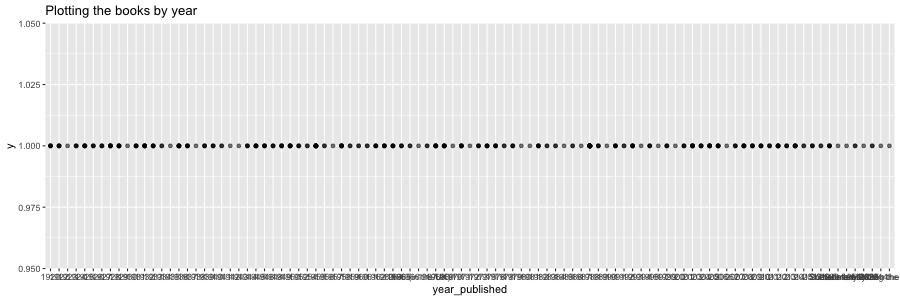

In [36]:
%%R -h 300 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=year_published, y=1, alpha=.05) + 
    geom_point() +
    geom_vline(aes(xintercept=0), color='red')  +
    labs(
        title='Plotting the books by year',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")


#### Range of years exists
However, there is a lot of overlap, perhaps jitter plot will help

## Jitter plot

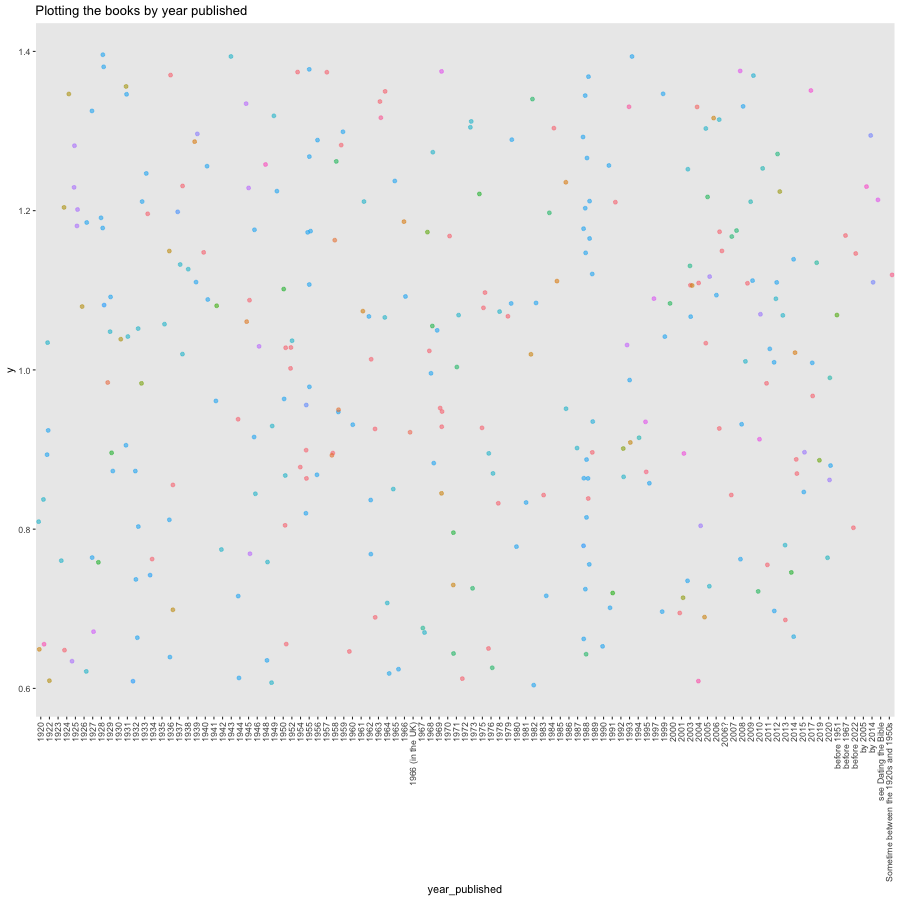

In [37]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=year_published, y=1, alpha=.05, color=type) + 
    geom_jitter() +
    labs(
        title='Plotting the books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())


In [38]:
df_banned_books_by_country.year_published.value_counts().head(10)

1988    19
1955    10
1969     6
1958     6
2014     6
1932     6
1950     6
2005     6
2003     6
2012     6
Name: year_published, dtype: int64

In [39]:
df_banned_books_by_country

,title,author_s,year_published,year_published_with_complex,short_date_range,long_date_range,end_date,end_date_r,Year_Banned,year_unbanned,type,notes,country,nation_or_state,state,clustered_type,further_clustered_type,extra_cluster
0,The Epic of Shivaji: A Translation and Study o...,James Laine,2006,2006,1996-2020,1951_to_date,2006,2007,NaN,NaN,Unspecified,The book was banned for allegedly containing d...,India,statewide,Maharashtra,Unspecified,Unspecified,Other
1,The Da Vinci Code,Dan Brown,2006,2006,1996-2020,1951_to_date,2006,2007,NaN,NaN,Unspecified,The book was banned by the government for alle...,India,statewide,Nagaland,Unspecified,Unspecified,Other
2,The Adivasi Will Not Dance,Hansda Sowvendra Shekhar,2017,2017,1996-2020,1951_to_date,2017,2018,NaN,NaN,Unspecified,"On 11 August 2017, the government of Jharkhand...",India,statewide,Jharkhand,Unspecified,Unspecified,Other
3,Teatro Political Dos,Malou Jacob,2014,2014,1996-2020,1951_to_date,2014,2015,NaN,NaN,Unspecified,Banned in 2022 by the Commission on the Filipi...,Phillipines,NaN,NaN,Unspecified,Unspecified,Other
4,Shivaji: Hindu King in Islamic India,James Laine,2004,2004,1996-2020,1951_to_date,2004,2005,NaN,NaN,Unspecified,"In January 2004, a mob alleging disparaging re...",India,statewide,Maharashtra,Unspecified,Unspecified,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,Borstal Boy,Brendan Behan,1958,1958,1946-1970,1951_to_date,1958,1959,NaN,NaN,Autobiographical novel,Banned shortly after its ban in Ireland in 195...,New Zealand,NaN,NaN,Autobiography/ Biography/ Memoir,Autobiography/ Biography/ Memoir,Other
315,Old Soldier Sahib,Frank Richards,1936,1936,1920-1945,1801_to_1950,1936,1937,NaN,NaN,Unspecified,The book cannot be imported into India.[6] The...,India,nationwide,NaN,Autobiography/ Biography/ Memoir,Autobiography/ Biography/ Memoir,Other
316,Friedrich Engels: A Biography,Gustav Mayer,1920,1920,1920-1945,1801_to_1950,1920,1921,NaN,NaN,Biography,Banned under the Internal Security (Prohibitio...,Singapore,NaN,NaN,Autobiography/ Biography/ Memoir,Autobiography/ Biography/ Memoir,Other
317,I Knock at the Door,Seán O'Casey,1939,1939,1920-1945,1801_to_1950,1939,1940,NaN,NaN,Autobiography,Banned in Ireland.[155],Ireland,NaN,NaN,Autobiography/ Biography/ Memoir,Autobiography/ Biography/ Memoir,Other


# How can this visualisation of timelines be reader facing?

### Exploring how other people have made timelines

In [40]:
# %%R

# library(timevis)

# data_timeline <- df_banned_books_by_country_r.frame(
#   id      = df_banned_books_by_country_r$Title,
#   content = df_banned_books_by_country_r$Title,
#   start   = df_banned_books_by_country_r$year_published,
#   end     = df_banned_books_by_country_r$year_published
# )

# timevis(data_timeline)

#### How one person did it

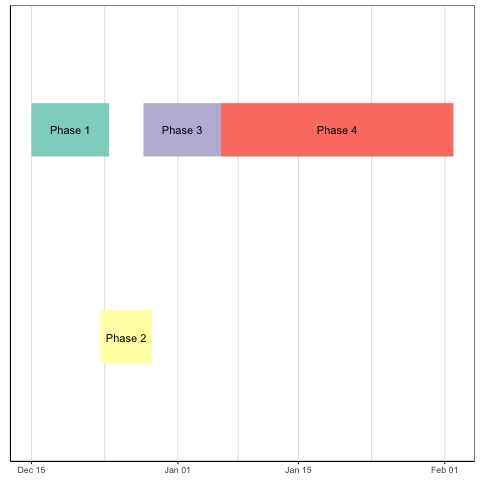

In [41]:
%%R
library(vistime)
library(shiny)
library(plotly)



data <- read.csv(text="event,start,end
                       Phase 1,2020-12-15,2020-12-24
                       Phase 2,2020-12-23,2020-12-29
                       Phase 3,2020-12-28,2021-01-06
                       Phase 4,2021-01-06,2021-02-02")
        
gg_vistime(data, optimize_y = TRUE, linewidth = 25)

#### How another person did it

In [42]:
# %%R

# device.data <- data.frame(
#     DeviceName = c("Cypher Sirolimus DES", "Taxus Express 2", "Cypher Select Sirolimus DES",
#               "Cypher Select Plus Sirolimus DES", "Taxus Liberte", "Endeavor ABT578",
#               "Endeavor Sprint Zotarolimus DES", "Xience V", "Taxus Element Monrail ION",
#               "Xience Nano", "Promus Element Plus", "Xience Prime",
#              "Endeavor Resolute DES","Endeavor Resolute Integrity DES", "Promus Premier", "Xience Xpedition LL and SV"),
#     DeviceManufacturer = c("Cordis Cashel","Boston Scientific","Cordis Cashel",
#                      "Cordis Cashel","Boston Scientific","Medtronic Inc",
#                      "Medtronic Inc", "Abbott Vascular", "Boston Scientific",
#                      "Abbott Vascular","Boston Scientific", "Abbott Vascular",
#                      "Medtronic Inc", "Medtronic Inc","Boston Scientific", "Abbott Vascular"),
#     start_date = as.Date(c("2002-11-15", "2003-09-09", "2005-10-21", 
#                      "2006-10-25","2008-02-05", "2008-02-27",
#                      "2009-06-10", "2009-08-21", "2011-08-19",
#                      "2011-10-24", "2012-01-30", "2012-04-10",
#                      "2012-04-14", "2013-03-07", "2013-09-30", "2014-02-19")),
#     end_date = as.Date(c("2007-07-18", "2010-11-10", "2007-07-18",
#                    "2013-04-05", "2013-11-01", "2016-03-31",
#                    "2016-03-31", "2016-03-31", "2011-09-16",
#                    "2016-03-31", "2016-03-31", "2016-03-31",
#                    "2016-03-31", "2016-03-31", "2016-03-31", "2016-03-31")),
#     stringsAsFactors = FALSE
#     )
# #data visualization
# vistime(device.data, events = "DeviceName", groups = "DeviceManufacturer", 
#                      start = "start_date", end = "end_date")


## Attempt at replicating

In [43]:
# %%R


# device.data <- df_banned_books_by_country_r.frame(
#     Title = as.list(df_banned_books_by_country_r$Title),
#     Year = as.list(df_banned_books_by_country_r$year_published),
#     start_date = as.Date(as.list(df_banned_books_by_country_r$year_published)),
#     end_date = as.Date(as.list(df_banned_books_by_country_r$end_date_r)),
#     stringsAsFactors = FALSE
#     )
# #data visualization
# vistime(device.data, events = "Title", groups = "Year", 
#                      start = "start_date", end = "end_date")


In [44]:
# %%R

# device.data <- df_banned_books_by_country_r.frame(
#     Title = c(df_banned_books_by_country_r$Title),
#     Year = c(df_banned_books_by_country_r$year_published),
#     start_date = as.Date(c(df_banned_books_by_country_r$year_published)),
#     end_date = as.Date(c(df_banned_books_by_country_r$year_published)),
#     stringsAsFactors = FALSE
#     )
# #data visualization
# vistime(device.data, events = "Title", groups = "Year", 
#                      start = "start_date", end = "end_date")


# After conversation with Aisvarya, considering rerouting from Gantt chart to this kind of chart

Every Hindi film song by Lata Mangeshkar, in one graphic: https://www.hindustantimes.com/static/lata-mangeshkar-every-hindi-film-song-one-graphic/

#### Starting with dot plot

# I need plots for:
* time trend overall
* time trend by types of books
* time trend by country? (not sure, maybe the first fluorish parchment graph is sufficient)
* time trend by authors? (not sure, maybe tmi...yea actually it would be like the same as time trend by titles which would be too much, maybe instead add authors to pop up of fluorish parchment graph)
* highlight most affected authors


# Time trend overall

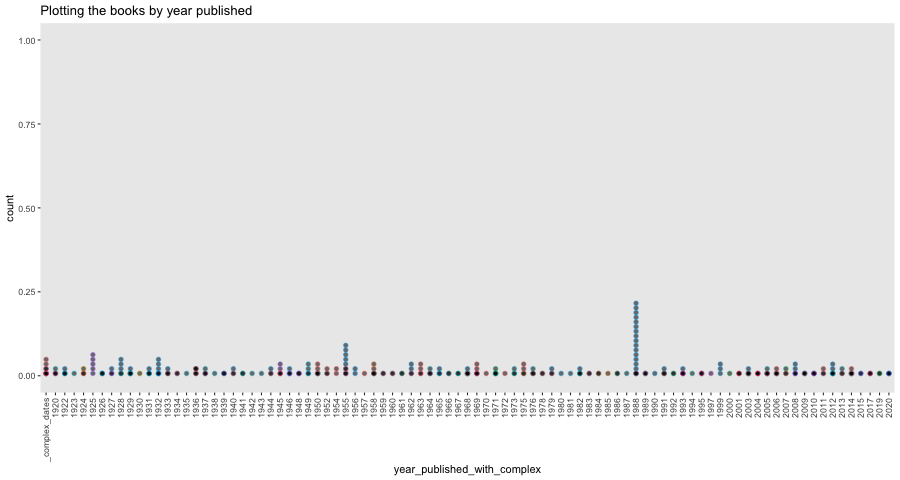

In [45]:
%%R -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=year_published_with_complex, alpha=.05, color=type) + 
    geom_dotplot(binwidth = 0.5) +
    labs(
        title='Plotting the books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

### Flipping this

Unlikely to be the right thing but just checking

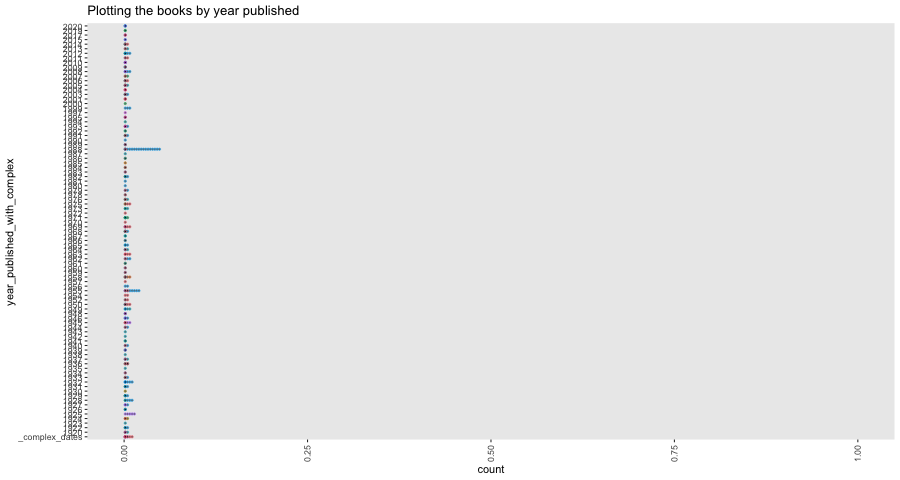

In [46]:
%%R -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=year_published_with_complex, alpha=.05, color=type) + 
    geom_dotplot(binwidth = 0.5) +
    labs(
        title='Plotting the books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

## Time trend in larger bins

# Dot plots
### to show time trend for all books banned


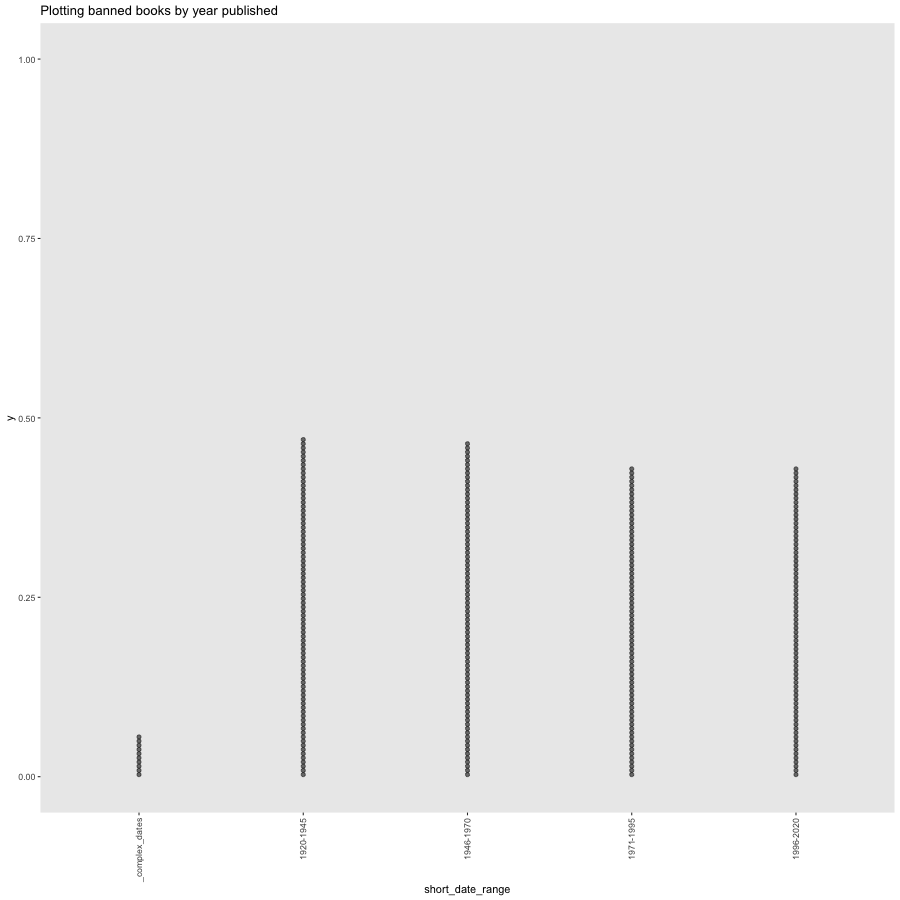

In [47]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, y=1, alpha=.05) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.085) +
    labs(
        title='Plotting banned books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
#     theme_void()

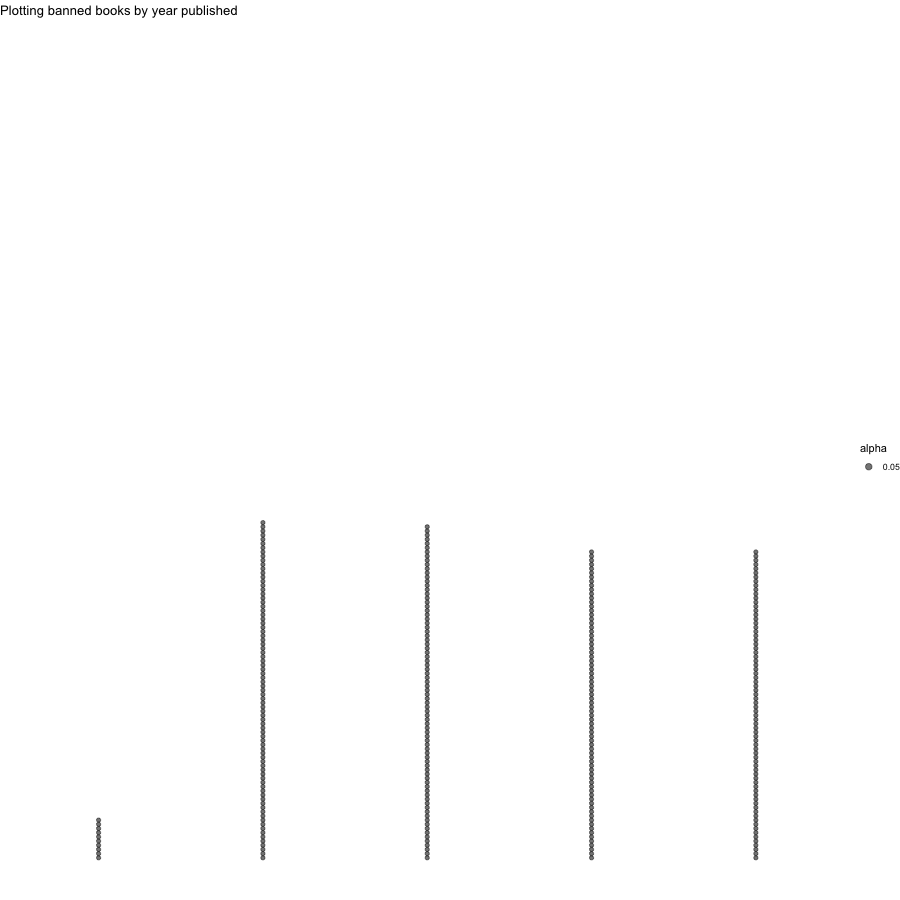

In [48]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, y=1, alpha=.05) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.085) +
    labs(
        title='Plotting banned books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    theme_void()

In [49]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, y=1, alpha=.05) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.085) +
    labs(
        title='Plotting banned books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    theme_void()
    ggsave("book_by_year_bins.svg")

Saving 12.5 x 12.5 in image


In [50]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, y=1, alpha=.05) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.085) +
    labs(
        title='Plotting banned books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    theme_void()+
    coord_flip()

ggsave("book_by_year_bins_wide.svg")

Saving 12.5 x 12.5 in image


### Turning this around

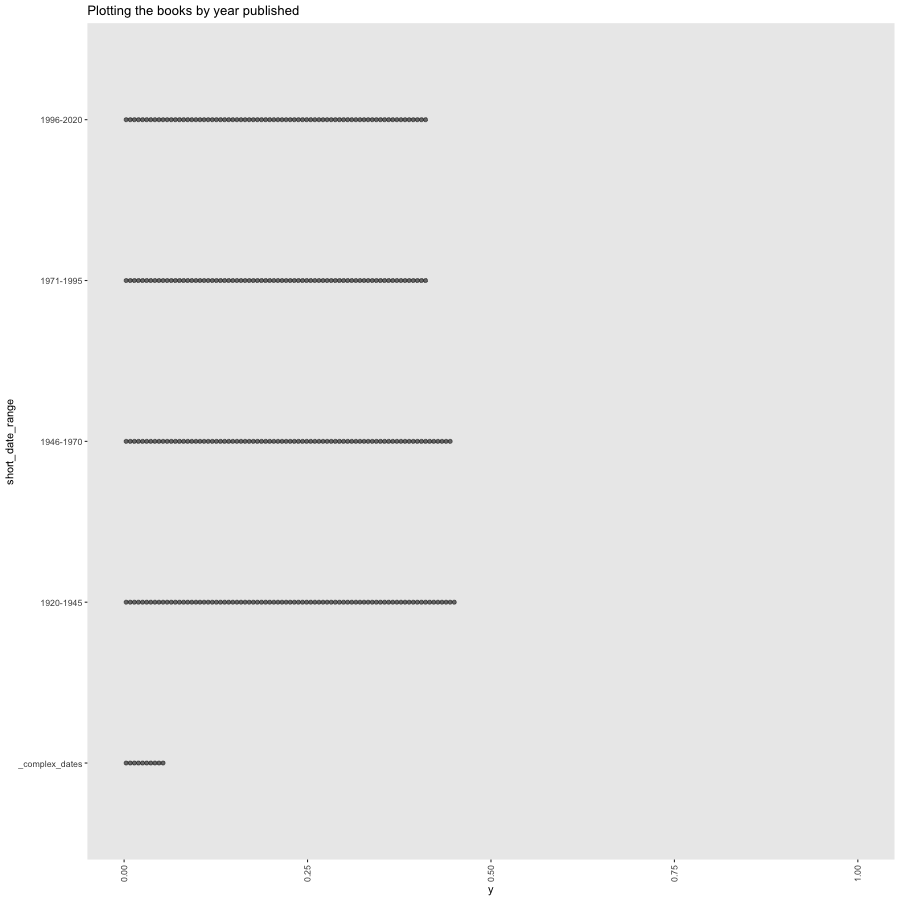

In [51]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, y=1, alpha=.05, dotsize=0.05) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.085) +
    labs(
        title='Plotting the books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

`geom_dotplot()` called with `stackgroups = TRUE` and `method =
"dotdensity"`.", i = "Do you want `binpositions = "all"` instead?


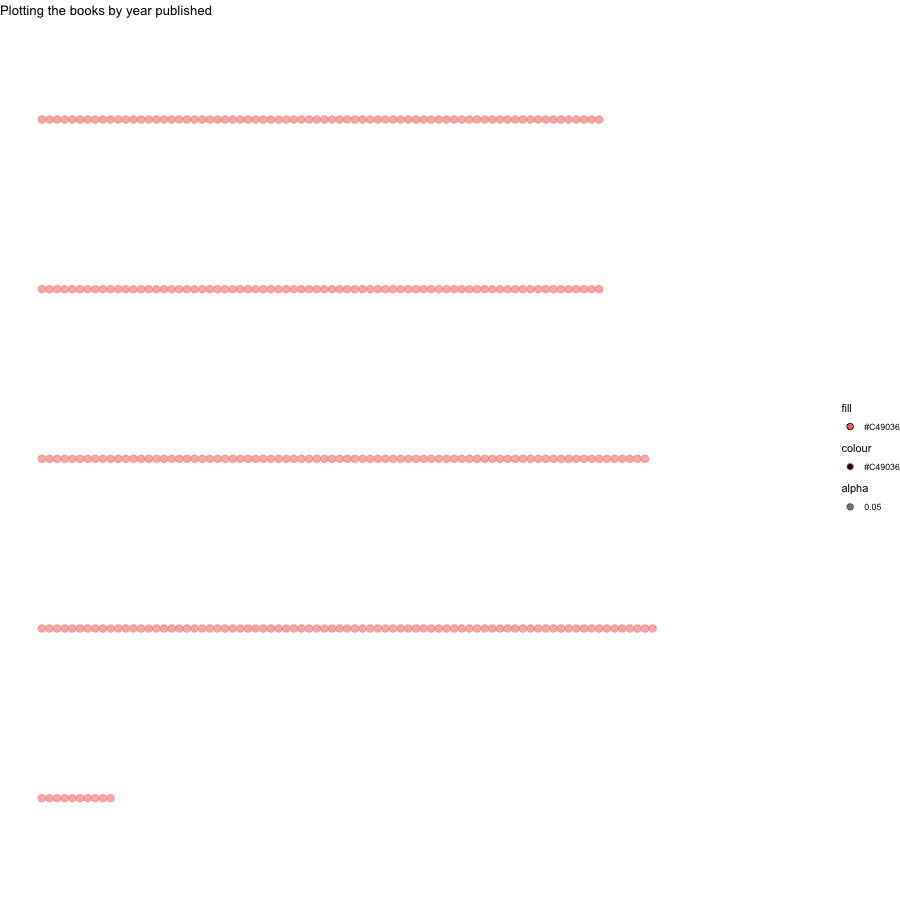

In [72]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, y=1, alpha=.05, color = "#C49036", fill="#C49036") + 
    geom_dotplot(binwidth = 0.3, dotsize=0.15, stackgroups=TRUE) +
    labs(
        title='Plotting the books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()+
    theme_void()

In [53]:
%%R -h 900 -w 900


# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, y=1, alpha=.05, dotsize=0.05, color = "#CC33CC") + 
    geom_dotplot(binwidth = 0.3, dotsize=0.085) +
    labs(
        title='Plotting the books by year published',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()+
    theme_void()

ggsave("books_banned_over_time.svg")

Saving 12.5 x 12.5 in image


# to also show types of books banned over time

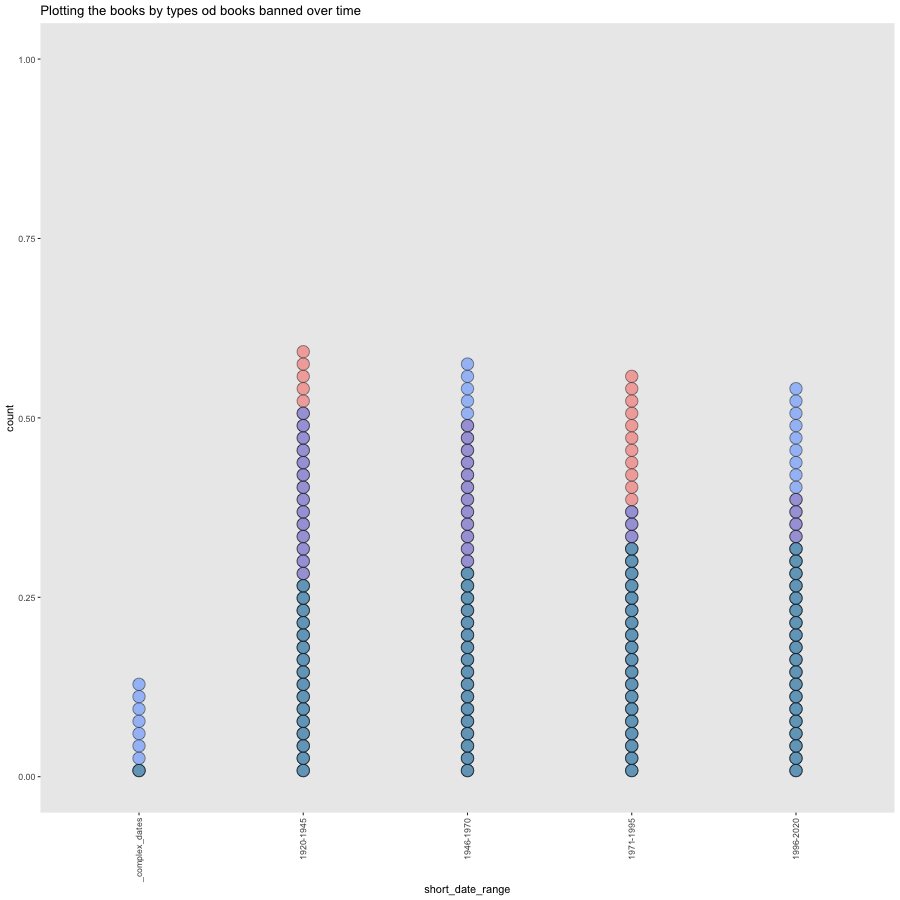

In [64]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, alpha=.05, fill=extra_cluster) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.25) +
    labs(
        title='Plotting the books by types od books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

### Try turning it around

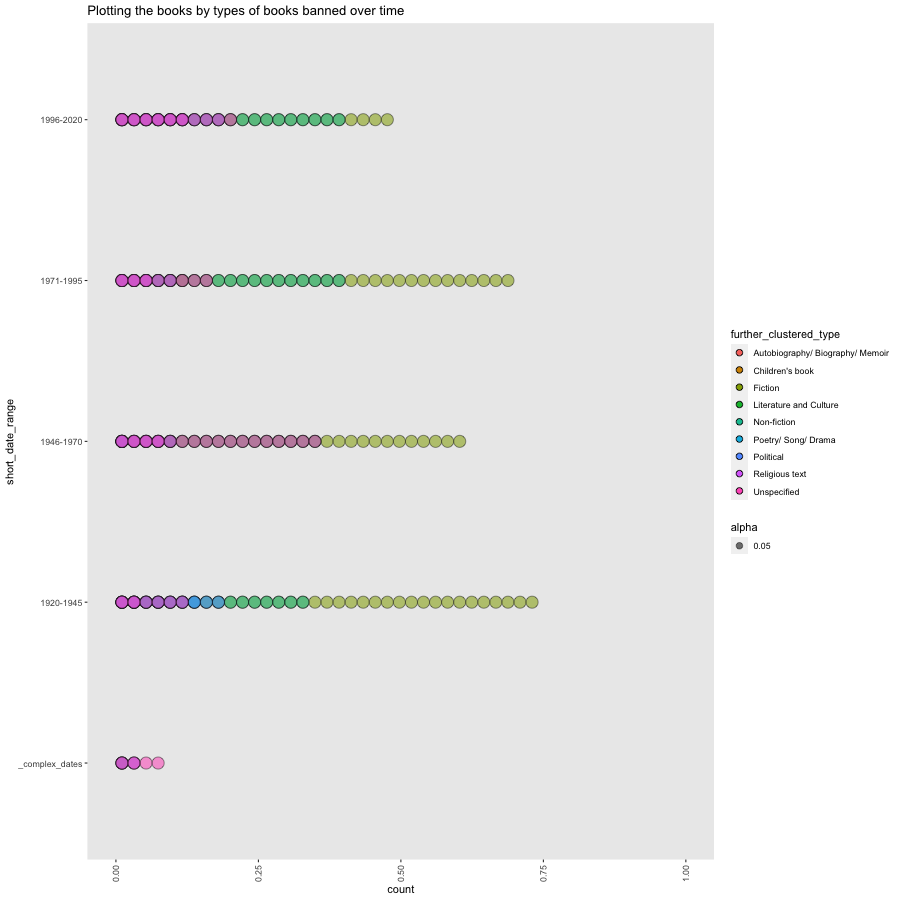

In [66]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, alpha=.05, fill=further_clustered_type) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.25) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
#     theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

In [56]:
df_banned_books_by_country.extra_cluster.value_counts().head(20)

Other          126
Fiction        121
Non-fiction     72
Name: extra_cluster, dtype: int64

In [68]:
df_banned_books_by_country.further_clustered_type.value_counts().head(40)

Fiction                             121
Non-fiction                          72
Unspecified                          45
Political                            28
Autobiography/ Biography/ Memoir     21
Religious text                       17
Poetry/ Song/ Drama                  10
Children's book                       4
Literature and Culture                1
Name: further_clustered_type, dtype: int64

In [77]:
df_banned_books_by_country.title.value_counts().head(40)

The Satanic Verses (1988)                                                             15
Mein Kampf (1925)                                                                      5
Lolita (1955)                                                                          5
Borstal Boy                                                                            3
Animal Farm                                                                            3
Lady Chatterley's Lover (1928)                                                         3
The Peaceful Pill Handbook (2007)                                                      2
The Satanic Verses                                                                     2
A Farewell to Arms                                                                     2
The Anarchist Cookbook                                                                 2
Brave New World                                                                        2
The Story of Ferdinan

In [67]:
df_banned_books_by_country.groupby("short_date_range").further_clustered_type.value_counts().head(40)

short_date_range  further_clustered_type          
1920-1945         Fiction                             35
                  Non-fiction                         16
                  Political                            9
                  Poetry/ Song/ Drama                  7
                  Unspecified                          6
                  Autobiography/ Biography/ Memoir     4
                  Children's book                      2
                  Religious text                       2
1946-1970         Fiction                             29
                  Non-fiction                         17
                  Unspecified                         17
                  Autobiography/ Biography/ Memoir     5
                  Political                            5
                  Religious text                       4
                  Children's book                      1
                  Literature and Culture               1
                  Poetry/ Song/ Drama

In [78]:
df_banned_books_by_country.country.value_counts().head(40)

India                   59
China                   30
Ireland                 21
Singapore               18
Australia               16
United States           13
Spain                   13
South Africa            12
United Kingdom          11
Russia                   9
Yugoslavia               8
Germany                  8
Phillipines              7
Canada                   7
Malaysia                 7
New Zealand              5
Pakistan                 4
Lebanon                  4
Indonesia                4
Bangladesh               3
Chile                    3
Thailand                 3
Qatar                    3
Eritrea                  3
Norway                   3
Nepal                    3
South Korea              3
Egypt                    2
France                   2
Iran                     2
Portugal                 2
Saudi Arabia             2
Morocco                  2
Czechoslovakia           2
Guatemala                2
Italy                    2
United Arab Emirates     2
V

In [88]:
df_countries_banned_books_by_country=pd.read_csv('countries_banned_books_by_country.csv')
df_countries_banned_books_by_country

,country,books_banned,world_share
0,India,59,19
1,China,30,10
2,Ireland,21,7
3,Singapore,18,6
4,Australia,16,5
5,United States,13,4
6,Spain,13,4
7,South Africa,12,4
8,United Kingdom,11,4


In [89]:
%%R

df_countries_banned_books_by_country_r<-read_csv('countries_banned_books_by_country.csv')




Rows: 9 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): country
dbl (2): books_banned, world_share

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


`geom_dotplot()` called with `stackgroups = TRUE` and `method =
"dotdensity"`.", i = "Do you want `binpositions = "all"` instead?


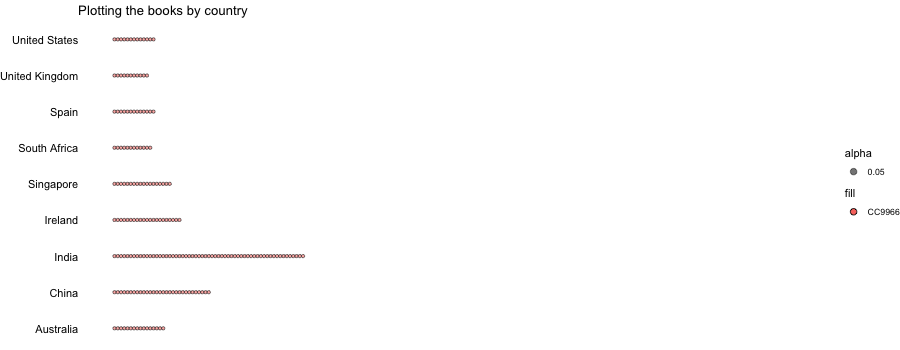

In [98]:
%%R -h 350 -w 900

# for time no colour:

df_uncounted <- df_countries_banned_books_by_country_r %>%
  uncount(books_banned)

ggplot(df_uncounted) +
    aes(x=country, alpha=.05, fill="CC9966") + 
    geom_dotplot(binwidth = 0.3, dotsize=0.3, stackgroups=TRUE) +
    labs(
        title='Plotting the books by country',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +
    theme_void()+
#     theme(legend.position="none")+
    theme(axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

In [100]:
%%R -h 350 -w 900

# for time no colour:

df_uncounted <- df_countries_banned_books_by_country_r %>%
  uncount(books_banned)

ggplot(df_uncounted) +
    aes(x=country, alpha=.05, fill="CC9966") + 
    geom_dotplot(binwidth = 0.3, dotsize=0.3, stackgroups=TRUE) +
    labs(
        title='Plotting the books by country',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +
    theme_void()+
#     theme(legend.position="none")+
    theme(axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

ggsave("highest_countries.svg")

`geom_dotplot()` called with `stackgroups = TRUE` and `method =
"dotdensity"`.", i = "Do you want `binpositions = "all"` instead?
Saving 12.5 x 4.86 in image


In [111]:
# !pip install pywaffle

In [123]:
df_countries_banned_books_by_country.books_banned=df_countries_banned_books_by_country.books_banned.astype(int)
df_countries_banned_books_by_country

,country,books_banned,world_share
0,India,59,19
1,China,30,10
2,Ireland,21,7
3,Singapore,18,6
4,Australia,16,5
5,United States,13,4
6,Spain,13,4
7,South Africa,12,4
8,United Kingdom,11,4


In [142]:
df_banned_books_by_country_highest_countries=pd.read_csv("banned_books_by_country_highest_countries.csv")

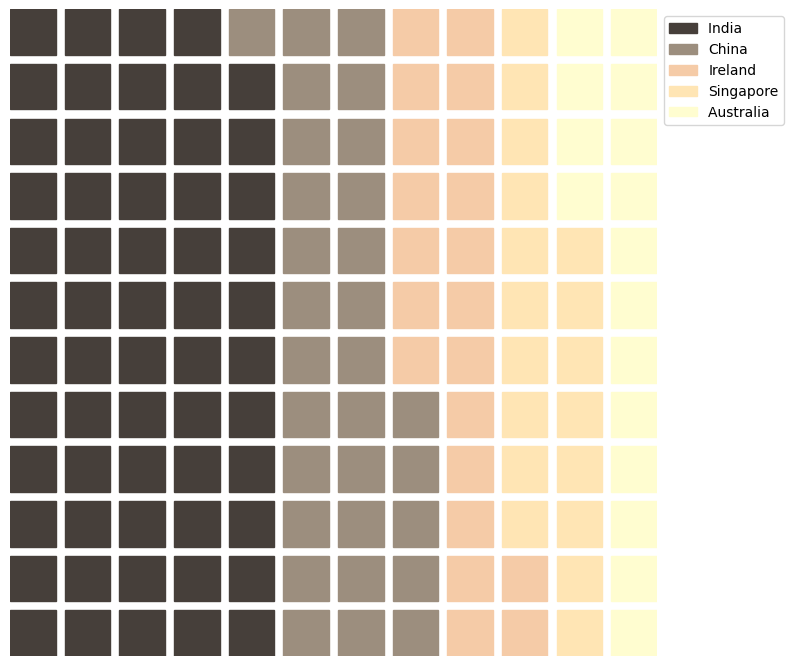

In [150]:
import pandas as pd
from pywaffle import Waffle

colors = ["#463F3A", "#9C8E7E", "#F5CBA7", "#FFE5B4", "#FFFDD0"]

# create a waffle chart
fig = plt.figure(
    FigureClass=Waffle, 
    rows=12, 
    values=df_banned_books_by_country_highest_countries['books_banned'], 
    labels=list(df_banned_books_by_country_highest_countries['country']),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    cmap_name='Accent',  # use custom color map
    colors=colors
)
plt.show()

fig.savefig('high_countries_waffle_chart.svg', bbox_inches='tight')



`geom_dotplot()` called with `stackgroups = TRUE` and `method =
"dotdensity"`.", i = "Do you want `binpositions = "all"` instead?


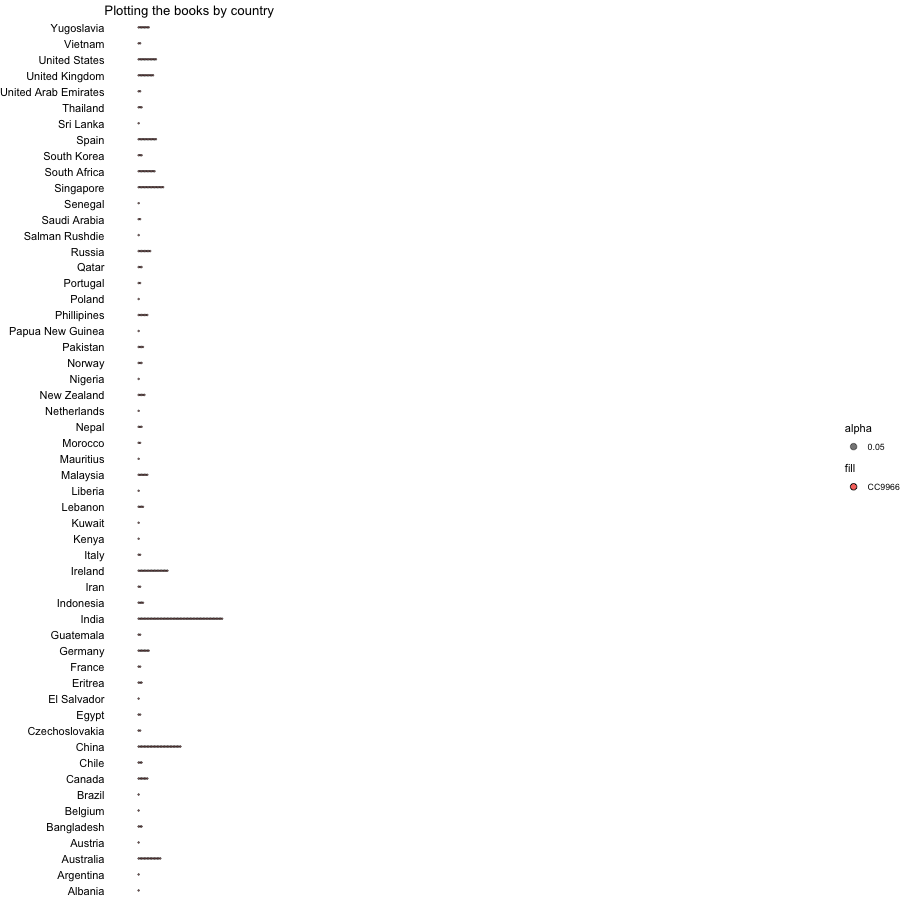

In [81]:
%%R -h 900 -w 900

# for time no colour:

ggplot(df_banned_books_by_country_r) +
    aes(x=country, alpha=.05, fill="CC9966") + 
    geom_dotplot(binwidth = 0.3, dotsize=0.3, stackgroups=TRUE) +
    labs(
        title='Plotting the books by country',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +
    theme_void()+
#     theme(legend.position="none")+
    theme(axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

`geom_dotplot()` called with `stackgroups = TRUE` and `method =
"dotdensity"`.", i = "Do you want `binpositions = "all"` instead?


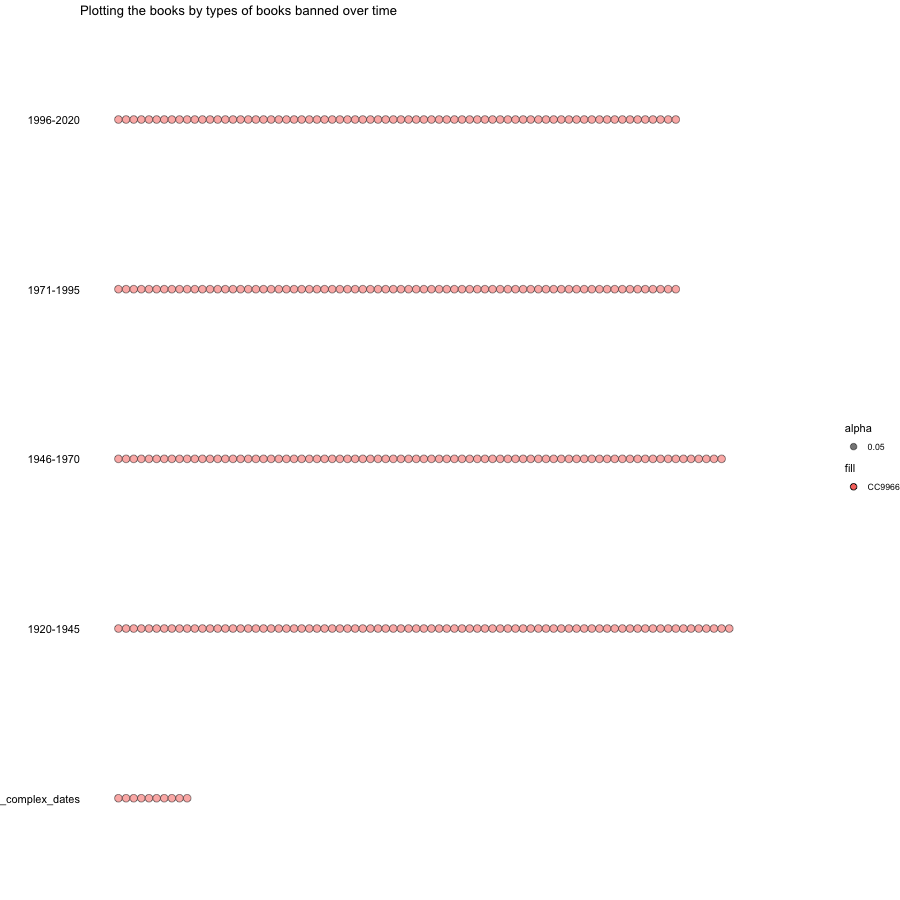

In [76]:
%%R -h 900 -w 900

# for time no colour:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, alpha=.05, fill="CC9966") + 
    geom_dotplot(binwidth = 0.3, dotsize=0.15, stackgroups=TRUE) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +
    theme_void()+
#     theme(legend.position="none")+
    theme(axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

`geom_dotplot()` called with `stackgroups = TRUE` and `method =
"dotdensity"`.", i = "Do you want `binpositions = "all"` instead?


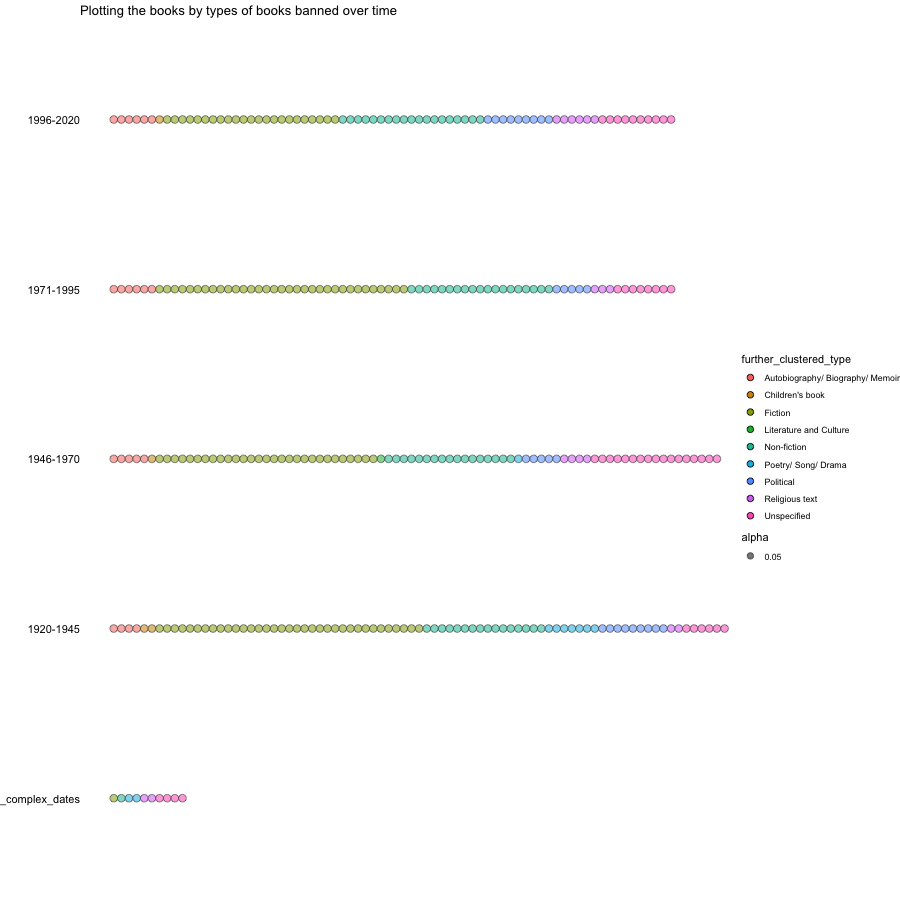

In [74]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, alpha=.05, fill=further_clustered_type) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.15, stackgroups=TRUE) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +
    theme_void()+
#     theme(legend.position="none")+
    theme(axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

`geom_dotplot()` called with `stackgroups = TRUE` and `method =
"dotdensity"`.", i = "Do you want `binpositions = "all"` instead?


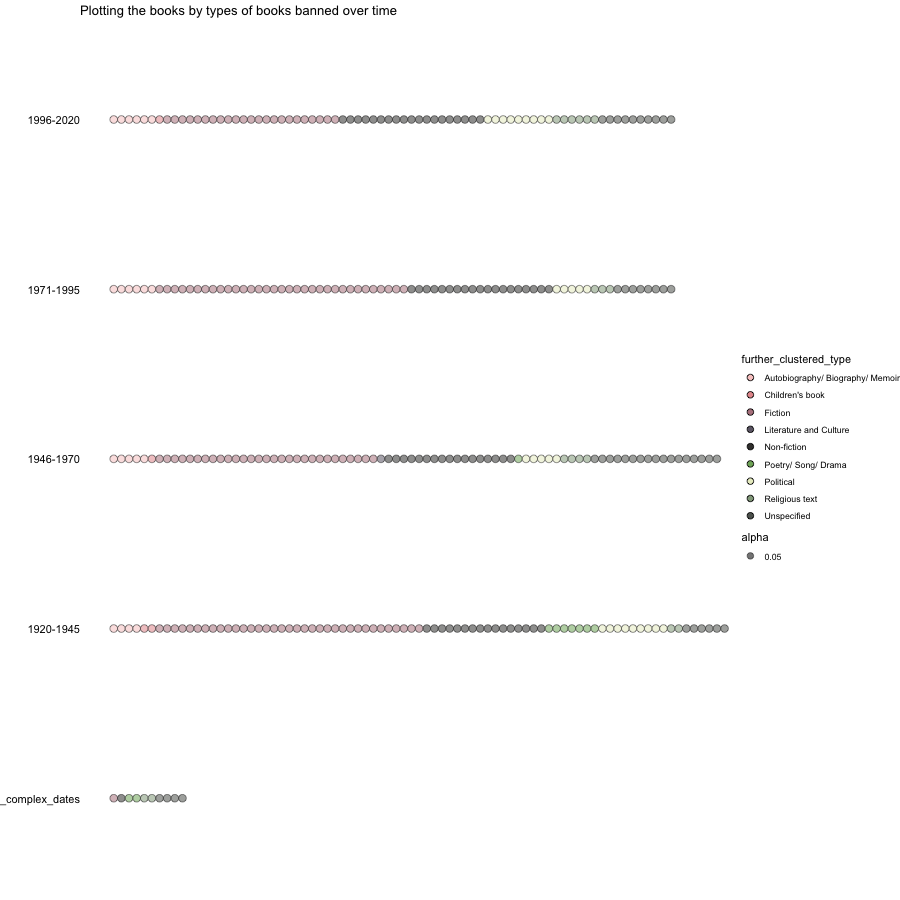

In [154]:
%%R -h 900 -w 900

# Define a color palette
my_colors <- c('#F7CAC9', '#E5989B', '#B5838D', '#6D6875', '#3F3E3B', '#7FB069', '#E9EDC9', '#92A68A', '#5E635E')

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, alpha=.05, fill=further_clustered_type) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.15, stackgroups=TRUE) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +
    theme_void()+
#     theme(legend.position="none")+
    theme(axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()+
    scale_fill_manual(values=my_colors)


In [155]:
%%R -h 900 -w 900

# Define a color palette
my_colors <- c('#F7CAC9', '#E5989B', '#B5838D', '#6D6875', '#3F3E3B', '#7FB069', '#E9EDC9', '#92A68A', '#5E635E')

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, alpha=.05, fill=further_clustered_type) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.15, stackgroups=TRUE) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +
    theme_void()+
#     theme(legend.position="none")+
    theme(axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()+
    scale_fill_manual(values=my_colors)
ggsave("books_by_type_brown.svg")

`geom_dotplot()` called with `stackgroups = TRUE` and `method =
"dotdensity"`.", i = "Do you want `binpositions = "all"` instead?
Saving 12.5 x 12.5 in image


In [75]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, alpha=.05, fill=further_clustered_type) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.15, stackgroups=TRUE) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +
    theme_void()+
#     theme(legend.position="none")+
    theme(axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

ggsave("books_w_type_unstacked.svg")

`geom_dotplot()` called with `stackgroups = TRUE` and `method =
"dotdensity"`.", i = "Do you want `binpositions = "all"` instead?
Saving 12.5 x 12.5 in image


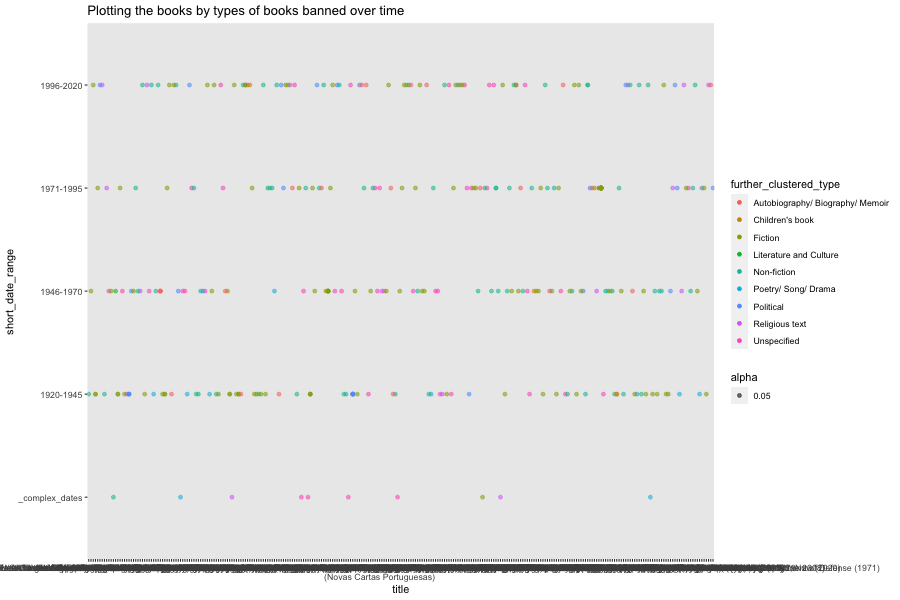

In [59]:
%%R -h 600 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(y=short_date_range, x=title, alpha=.05, col=further_clustered_type) + 
    geom_point(binwidth = 0.3, dotsize=0.25) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +
#     theme_void()+
#     theme(legend.position="none")+
    theme(axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

In [60]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, alpha=.05, fill=further_clustered_type) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.25) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +
    theme_void()+
#     theme(legend.position="none")+
    theme(axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()
ggsave("books_by_type.svg")

Saving 12.5 x 12.5 in image


# to also show countries banning over time

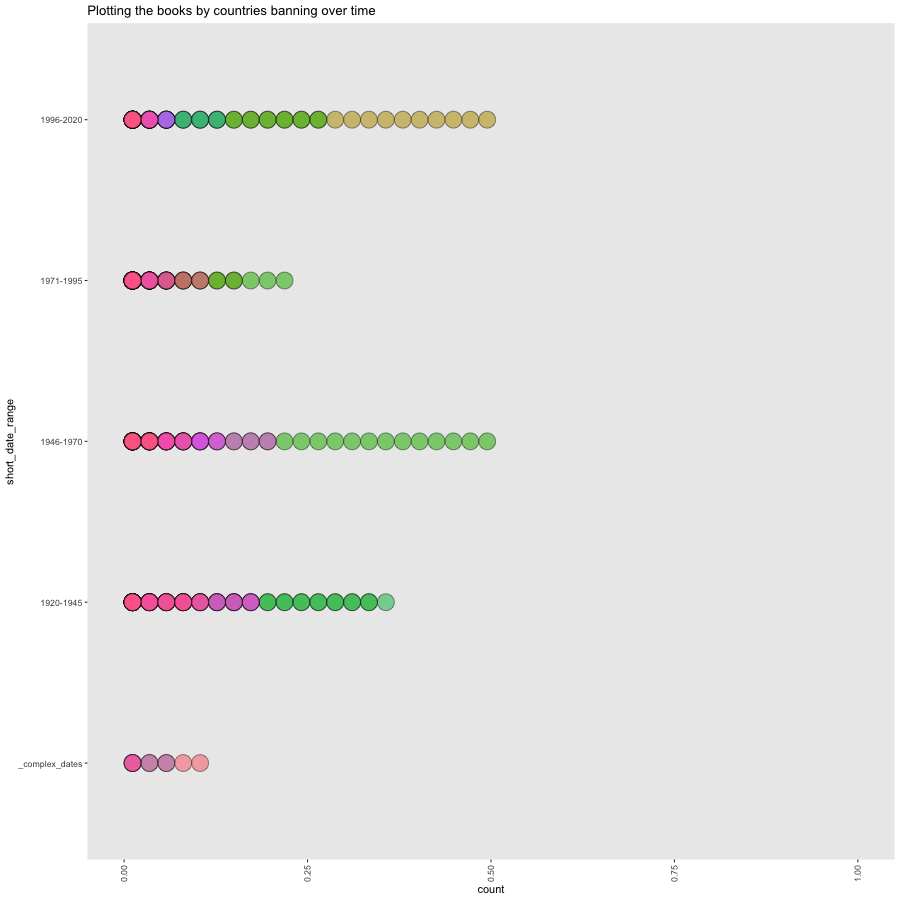

In [61]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, alpha=.05, fill=country) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.35) +
    labs(
        title='Plotting the books by countries banning over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()

### Try turning it around

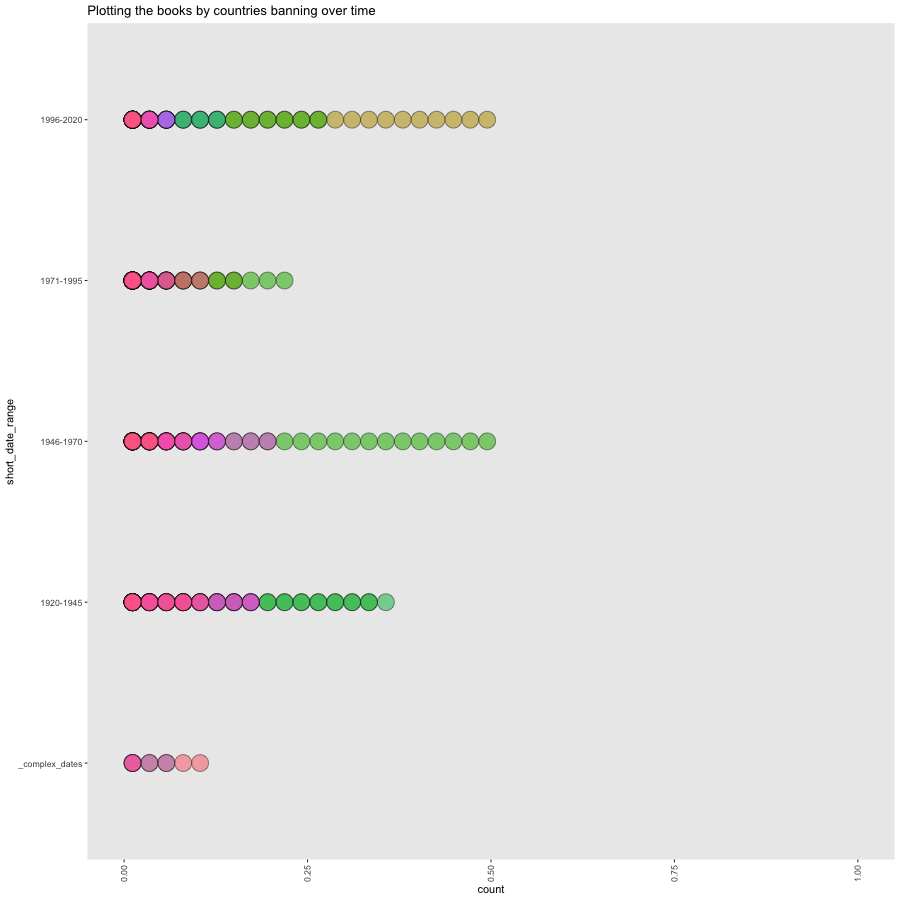

In [62]:
%%R -h 900 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=short_date_range, alpha=.05, fill=country) + 
    geom_dotplot(binwidth = 0.3, dotsize=0.35) +
    labs(
        title='Plotting the books by countries banning over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ 
    coord_flip()

# Replicating raw graphs gantt chart by country from raw graphs but in dot format...



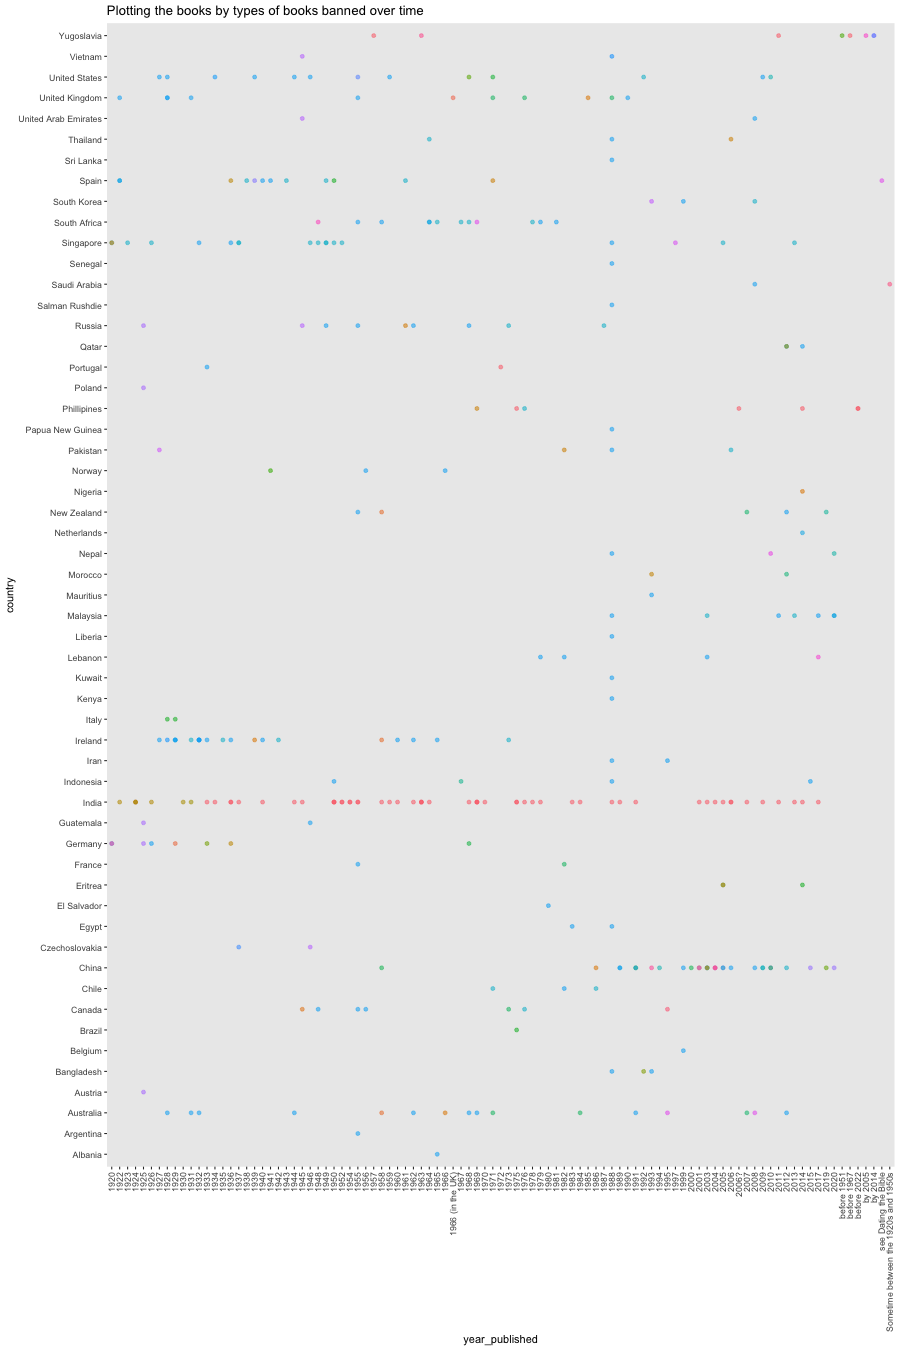

In [63]:
%%R -h 1350 -w 900

# Paste code below:

ggplot(df_banned_books_by_country_r) +
    aes(x=year_published, y=country, alpha=.05, colour=type, dotsize=0.05) + 
    geom_point(binwidth = 0.3, dotsize=0.25) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) + 
    theme(legend.position="none")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

#### Fluorish did a better job with this series of dot plots here: 
https://public.flourish.studio/visualisation/13204320/

# United States

Source of banned books in the world: https://en.wikipedia.org/wiki/List_of_books_banned_by_governments <br/>
Source of books in the world: World Digital Library <br/>
Source of most_frequently challenged books by decade: https://www.ala.org/advocacy/bbooks/frequentlychallengedbooks/top100 <br/>
Source of censorship attacks: https://www.everylibraryinstitute.org/book_censorship_database_magnusson <br/>
Source of censored books in India: https://en.wikipedia.org/wiki/List_of_books_banned_in_India
Other online searches for publication dates

In [156]:
df_banned_books_by_decade_ala=pd.read_csv("banned_books_by_decade_ala.csv")
df_banned_books_by_decade_ala

,Book,Decade
0,"Scary Stories (series), by Alvin Schwartz",1990-1999
1,"Daddy’s Roommate, by Michael Willhoite",1990-1999
2,"I Know Why the Caged Bird Sings, by Maya Angelou",1990-1999
3,"The Chocolate War, by Robert Cormier",1990-1999
4,"The Adventures of Huckleberry Finn, by Mark Twain",1990-1999
...,...,...
295,The Librarian of Basra by Jeanette Winter,2010-2019
296,The Walking Dead (series) by Robert Kirkman,2010-2019
297,Tricks by Ellen Hopkins,2010-2019
298,Uncle Bobby’s Wedding by Sarah S Brannen,2010-2019


In [162]:
df_banned_books_by_decade_ala.Book.value_counts().head(18)

The Kite Runner by Khaled Hosseini                              2
Bless Me, Ultima by Rudolfo Anaya                               2
Goosebumps (series) by R.L. Stine                               2
And Tango Makes Three by Justin Richardson and Peter Parnell    2
I Know Why the Caged Bird Sings by Maya Angelou                 2
Scary Stories (series) by Alvin Schwartz                        2
The Perks of Being a Wallflower by Stephen Chbosky              2
Fallen Angels by Walter Dean Myers                              2
Captain Underpants (series) by Dav Pilkey                       2
The Adventures of Huckleberry Finn by Mark Twain                2
The Color Purple by Alice Walker                                2
Gossip Girl (series) by Cecily von Ziegesar                     2
The Giver by Lois Lowry                                         2
Beloved by Toni Morrison                                        2
The Bluest Eye by Toni Morrison                                 2
Of Mice an

In [167]:
# df_challenged_2122 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenged Schools 21-22')
# df_challenged_2223 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenge 22-23')
df_new_groups = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='New Groups')
df_school_district_2122 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='By School District 21-22')
df_school_district_2021 = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenged Schools 2020-2')
df_challenging_groups = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Groups Formed In Response To Th')
df_challenged_public_libs = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Challenged Public Librari')
df_by_public_libs = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='By Public LIbraries')
df_relevant_articles = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Other Relevant Articles')
df_targeted_by_groups = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Books Targeted By Groups')
df_groups_to_ban_books = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Groups Formed To Ban Books')
df_key = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='KEY')
df_krause_texas_books = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Rep Krause 850 Texas Book List')
df_krause_texas_author = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='Krause List By Author')
df_northeastISD = pd.read_excel('book_censorship_attacks.xlsx', sheet_name='NorthEastISD Texas')

In [170]:
df_challenged_2223

,Author,Secondary Author(s),Illustrators,Translators,Book,School District,Missouri,IN P DOC,Date,Notes,Challenge/Complaint Status\n\n,Status,"Status Notes - See ""By School District"" Tab for More Detail",Details of Restriction,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,"Mosley, Walter",NaN,NaN,NaN,47,Keller ISD,Texas,yes,?,NaN,"""Returned to Circulation""",Challenged-Retained,https://www.kellerisd.net/Page/7660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Ukazu, Ngozi",NaN,NaN,NaN,#Hockey,Clay County School District,Florida,yes,2023-01-01 00:00:00,NaN,NaN,Removed from Shelves - While Under Review,From district website - update late Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Ukazu, Ngozi",NaN,NaN,NaN,#Hockey (Check Please),Frisco,Texas,yes,2022-11-01 00:00:00,NaN,Related to Jared Patterson part of his 28 chal...,Banned,Frisco ISD Board votes to remove books from li...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Ewert, Marcus",NaN,NaN,NaN,"10,000 Dresses",Clay County School District,Florida,no,2022-07-28 00:00:00,NLTE,Informal Challenge,Challenged - Location Unknown,Clay County Website With Links,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Ewert, Marcus",NaN,"Ray, Rex",NaN,"10,000 Dresses",Seminole County Public Schools,Florida,NaN,2022-07-01 00:00:00,NaN,Reviewed as a result of the law change,Retained - Restricted,Florida Freedom to Read Project,Restricted to 4/5 - must have parent permissio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,Amir,NaN,NaN,NaN,Zahra's Paradise,North Kansas City Schools,Missouri,yes,2022-09-01 00:00:00,Response to Law,NaN,Banned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2126,Amir & Khalil,NaN,NaN,NaN,Zahra's Paradise,Rockwood School District,Missouri,yes,NaN,NaN,2022-08-01 00:00:00,Banned,NaN,Response to MIssouri Senate Bill 775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,Amir,NaN,NaN,NaN,Zahra's Paradise,Webster Groves School District,Missouri,yes,2022-09-01 00:00:00,Response to Law,NaN,Banned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,"Bunker, Lisa",NaN,NaN,NaN,Zenobia July,Clay County School District,Florida,no,2022-07-28 00:00:00,"NLTE,HB 1557",Informal Challenge,Challenged - Location Unknown,Clay County Website With Links,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
df_challenged_2122['School District'].value_counts().head(20)

North East                              439
Central York                            356
Tennessee                               327
McKinney                                284
Duval County Public Schools             178
Indian River County Schools             152
Eanes                                   133
Granbury Independent School District    132
Murray City School District             101
Collier County Public Schools            85
Prosper ISD                              84
St. Johns County School District         75
Fauquier County Public Schools           62
Walton County School District            58
Davis School District                    44
Brevard County Public Schools            42
Katy                                     42
Fredericksburg ISD                       42
Keller                                   38
Bristow Public Schools                   38
Name: School District, dtype: int64

In [169]:
df_challenged_2223['School District'].value_counts().head(20)

Clay County School District                 623
Wentzville School District                  217
Escambia County Public Schools              155
Beaufort County School District              99
Horry County Schools                         84
Fauquier County Schools                      63
Keller ISD                                   53
Washington County School District            43
Flagler                                      42
Alpine School District                       38
St. John’s County School District            38
Frederick County Public Schools              35
School District of Manatee County            30
Lindbergh Schools                            29
Humble ISD                                   28
Williston Basin School District #7           27
The School District of Palm Beach County     26
Spotsylvania County Public Schools           25
Big Walnut Schools Delaware                  24
Madison County Public Schools                24
Name: School District, dtype: int64

In [171]:
df_challenged_2223['Book'].value_counts().head(20)

Flamer                                             21
All Boys Aren't Blue                               20
Crank                                              20
Sold                                               18
Looking for Alaska                                 17
Gender Queer                                       16
The Bluest Eye                                     16
Me and Earl and the Dying Girl                     16
Gender Queer: A Memoir                             15
Tilt                                               15
The Absolutely True Diary of a Part-Time Indian    15
Tricks                                             15
A Court of Mist and Fury                           15
The Perks of Being a Wallflower                    15
Damsel                                             14
What Girls Are Made Of                             14
Out of Darkness                                    13
Push                                               13
Milk and Honey              

In [176]:
df_challenged_2223=read_csv("books_challenged_2223.csv")

In [178]:
df_challenged_2223['clustered_book'].value_counts().head(20)

Gender Queer                                       32
Flamer                                             21
Crank                                              20
All Boys Aren't Blue                               20
A Court of Mist and Fury                           19
The Handmaid's Tale: The Graphic Novel             19
Sold                                               18
Looking for Alaska                                 17
Me and Earl and the Dying Girl                     17
This Book Is Gay                                   16
The Bluest Eye                                     16
The Perks of Being a Wallflower                    16
The Walking Dead Series                            16
Tricks                                             15
What Girls Are Made Of                             15
Tilt                                               15
The Absolutely True Diary of a Part-Time Indian    15
Damsel                                             14
Empire of Storms Series     

In [217]:
df_challenged_2122=read_csv("books_challenged_2122.csv")

df_challenged_2122['clustered_book'].value_counts()

Gender Queer: A Memoir                                                        81
All Boy's Aren't Blue                                                         67
Out of Darkness                                                               51
The Bluest Eye                                                                45
Lawn Boy                                                                      43
                                                                              ..
I'm Bored                                                                      1
I'm a Wild Seed: My Graphic Memoir on Queerness and Decolonizing the World     1
I'm a Pretty Little Girl                                                       1
I'm a Girl                                                                     1
Zombies on the Loose                                                           1
Name: clustered_book, Length: 1874, dtype: int64

In [186]:
df_challenged_2223['School District'].nunique()

121

In [187]:
df_challenged_2122['School District'].nunique()

276

In [213]:
df_challenged_2122

,Author,Book,School District,State,IN P DOC,Notes,Challenge/Complaint Status\n\n,Status,"Status Notes - See ""By School District"" Tab for More Detail",Details of Restriction,Where Did I find the book or discover the resource,Have You Read Or Examined the Entire Resource,Location in School District,Published,# Copies Total In District,Date Challenged,clustered_book
0,"Kerr, M. E.","""Hello,"" I lied : a novel",North East,Texas,yes,NaN,No Challenge Filed,NaN,Removed from shelves for review on basis of Re...,NaN,NaN,NaN,NaN,1998,1,NaN,"""Hello,"" I lied : a novel"
1,"Thomas, Rachel",#blacklivesmatter,Indian River County Schools,Florida,yes,Status Change: 2/28/22,unclear,RETURNED - FL as 5/2022,Temporarily removed while under review,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#blacklivesmatter
2,"Thomas, Rachel\n L.",#BlackLivesMatter :\n protesting racism,North East,Texas,yes,NaN,NaN,NaN,Removed from shelves for review on basis of Re...,NaN,NaN,NaN,NaN,2020,2,NaN,#BlackLivesMatter :\n protesting racism
3,"Ukazu, Ngozi","#Hockey (Check, Please! Series)",Tennessee,Collierville Schools,Yes,TWO,no challenge,back on shelves probably,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"#Hockey (Check, Please! Series)"
4,"McNeil, Gretchen",#Murder Trending,Savannah-Chatham County Public School SYstem,Georgia,NaN,NaN,Informal Challenge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#Murder Trending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,"Bunker, Lisa",Zenobia July,McKinney,Texas,NaN,2/15/22,Yes,Challenged - Pending,Watch to see if they stay on shelves or not - ...,NaN,NaN,NaN,NaN,NaN,MS / HS,NaN,Zenobia July
4019,"Bunker, Lisa",Zenobia July,Prosper ISD,Texas,NaN,NaN,yes,Challenged - Prob. on shelvesa,Complaint Filed - status unclear,NaN,NaN,NaN,NaN,NaN,5,NaN,Zenobia July
4020,"Brandon, James","Ziggy, Stardust & me",North East,Texas,yes,NaN,No Challenge Filed,NaN,Removed from shelves for review on basis of Re...,NaN,NaN,NaN,NaN,2019,1,NaN,"Ziggy, Stardust & me"
4021,"Rooney, Anne",Zombies on the Loose,Eanes,Texas,no,Elementary,Formal Challenge Filed,Retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zombies on the Loose


In [192]:
%%R

df_top_5_school_books<-read_csv("top_5_school_books.csv")

Rows: 11 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): school_year, title
dbl (2): number_banned, share_of_top_5

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [194]:
%%R -h 900 -w 900

df_top_5_school_books_2122 = df_top_5_school_books %>% filter(school_year=='2021-2022')
df_top_5_school_books_2223 = df_top_5_school_books %>% filter(school_year=='2022-2023')


In [206]:
%%R
df_challenged_2122_r<-read_csv("books_challenged_2122.csv")


Rows: 4023 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): Author, Book, School District, State, IN P DOC, Notes, Challenge/C...
lgl  (1): Location in School District

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


`geom_dotplot()` called with `stackgroups = TRUE` and `method =
"dotdensity"`.", i = "Do you want `binpositions = "all"` instead?
Bin width defaults to 1/30 of the range of the data. Pick better value with
`binwidth`.


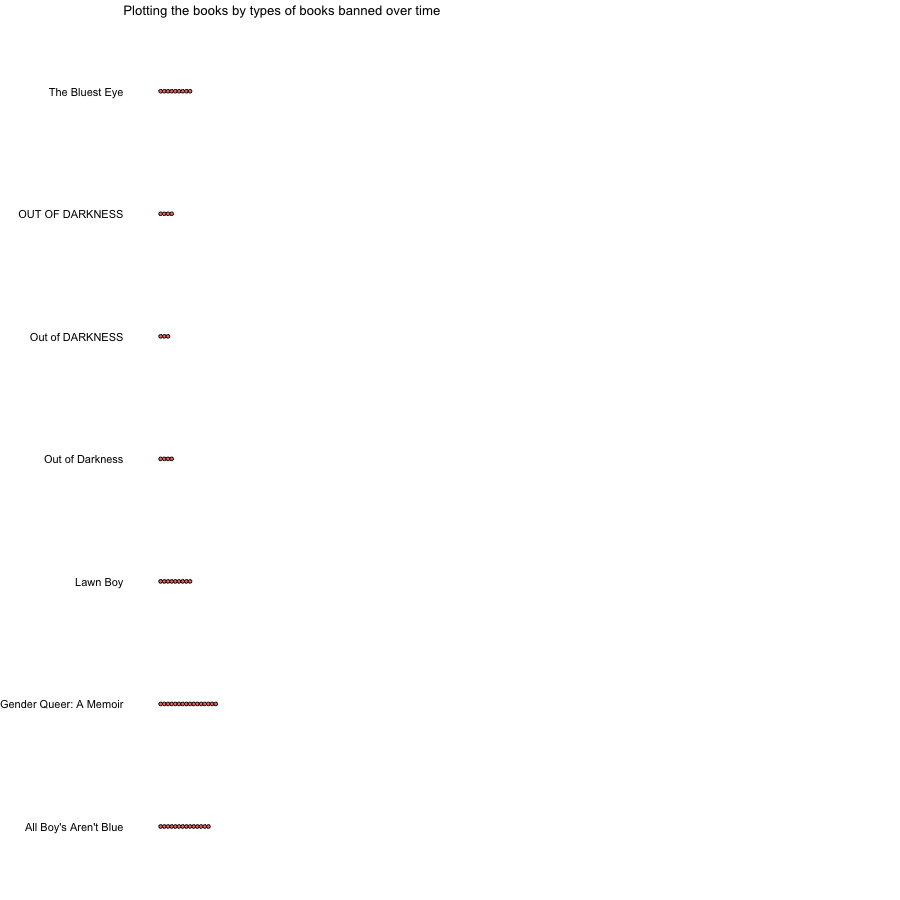

In [229]:
%%R -h 900 -w 900


df_challenged_2122_top<-df_challenged_2122_r %>% 
    filter(clustered_book==c('Gender Queer: A Memoir','All Boy\'s Aren\'t Blue','Out of Darkness','The Bluest Eye','Lawn Boy'))

# Define a color palette

ggplot(df_challenged_2122_top) +
    aes(x=Book, fill="CC9966") + 
    geom_dotplot(dotsize=0.15, stackgroups=TRUE) +
    labs(
        title='Plotting the books by types of books banned over time',
#         subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support"
    ) +
    theme_void()+
    theme(legend.position="none")+
    theme(axis.text.y = element_text(angle = 0, vjust = 0.5, hjust=1))+ 
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    coord_flip()


In [230]:
df_challenged_2122.head(3)

,Author,Book,School District,State,IN P DOC,Notes,Challenge/Complaint Status\n\n,Status,"Status Notes - See ""By School District"" Tab for More Detail",Details of Restriction,Where Did I find the book or discover the resource,Have You Read Or Examined the Entire Resource,Location in School District,Published,# Copies Total In District,Date Challenged,clustered_book
0,"Kerr, M. E.","""Hello,"" I lied : a novel",North East,Texas,yes,NaN,No Challenge Filed,NaN,Removed from shelves for review on basis of Re...,NaN,NaN,NaN,NaN,1998,1,NaN,"""Hello,"" I lied : a novel"
1,"Thomas, Rachel",#blacklivesmatter,Indian River County Schools,Florida,yes,Status Change: 2/28/22,unclear,RETURNED - FL as 5/2022,Temporarily removed while under review,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#blacklivesmatter
2,"Thomas, Rachel\n L.",#BlackLivesMatter :\n protesting racism,North East,Texas,yes,NaN,NaN,NaN,Removed from shelves for review on basis of Re...,NaN,NaN,NaN,NaN,2020,2,NaN,#BlackLivesMatter :\n protesting racism


In [267]:

df_challenged_2122[df_challenged_2122['Book'].notna()]['Book'].str.lower().str.contains("gender")



0       False
1       False
2       False
3       False
4       False
        ...  
4017    False
4018    False
4019    False
4020    False
4021    False
Name: Book, Length: 4022, dtype: bool

In [274]:
df_challenged_2122_gender_count = df_challenged_2122['Book'].str.lower().str.contains('gender', na=False).sum()
df_challenged_2122_gender_count

181

In [275]:
df_challenged_2122_sexuality_count = df_challenged_2122['Book'].str.lower().str.contains('sexuality', na=False).sum()
df_challenged_2122_sexuality_count

14

In [276]:
df_challenged_2122_sex_count = df_challenged_2122['Book'].str.lower().str.contains('sex', na=False).sum()
df_challenged_2122_sex_count

79

In [290]:
df_challenged_2122['Book']

0                     "Hello," I lied : a novel
1                             #blacklivesmatter
2       #BlackLivesMatter :\n protesting racism
3               #Hockey (Check, Please! Series)
4                              #Murder Trending
                         ...                   
4018                               Zenobia July
4019                               Zenobia July
4020                       Ziggy, Stardust & me
4021                       Zombies on the Loose
4022                                        NaN
Name: Book, Length: 4023, dtype: object

In [296]:
from collections import Counter
common_words_dict_list=Counter(" ".join(df_challenged_2122["Book"].astype(str)).split()).most_common(200)

In [297]:
#make a dataframe of common words
df_common_words_dict_list = pd.DataFrame(common_words_dict_list, columns =['word', 'frequency'])
df_common_words_dict_list

,word,frequency
0,The,775
1,of,570
2,the,547
3,and,464
4,A,335
...,...,...
195,People,13
196,After,13
197,Dark,13
198,Name,13


In [298]:
#make the words lower case
df_common_words_dict_list['word_lower']=df_common_words_dict_list['word'].apply(lambda x: x.lower().strip())

In [300]:
#get the length of the word
df_common_words_dict_list['word_length'] = df_common_words_dict_list['word'].str.len()
df_common_words_dict_list

,word,frequency,word_lower,word_length
0,The,775,the,3
1,of,570,of,2
2,the,547,the,3
3,and,464,and,3
4,A,335,a,1
...,...,...,...,...
195,People,13,people,6
196,After,13,after,5
197,Dark,13,dark,4
198,Name,13,name,4


In [301]:
#remove punctuations for all

df_common_words_dict_list['word_lower']=df_common_words_dict_list['word_lower'].apply(lambda x: x.lower().translate(str.maketrans('', '', string.punctuation)))
df_common_words_dict_list

,word,frequency,word_lower,word_length
0,The,775,the,3
1,of,570,of,2
2,the,547,the,3
3,and,464,and,3
4,A,335,a,1
...,...,...,...,...
195,People,13,people,6
196,After,13,after,5
197,Dark,13,dark,4
198,Name,13,name,4


In [302]:
#put like words together
# df_common_words_dict_list.sort_values(by='word', ascending=False).head(50)

unique_common_words=df_common_words_dict_list.groupby('word_lower').frequency.sum()
unique_common_words

word_lower
              293
57             15
a             606
about          75
absolutely     32
             ... 
will           17
with           24
world          46
you           108
your           30
Name: frequency, Length: 168, dtype: int64

In [303]:
# type(unique_common_words)

#make a dataframe for unique common words
df_unique_common_words=pd.DataFrame(unique_common_words)
df_unique_common_words

,frequency
word_lower,
,293
57,15
a,606
about,75
absolutely,32
...,...
will,17
with,24
world,46


In [304]:
#reset the index so I can access the word column as a column rather than an index
df_unique_common_words.reset_index(inplace=True)
df_unique_common_words

,word_lower,frequency
0,,293
1,57,15
2,a,606
3,about,75
4,absolutely,32
...,...,...
163,will,17
164,with,24
165,world,46
166,you,108


In [306]:
#find the length of words for the unique common words
df_unique_common_words['word_length'] = df_unique_common_words['word_lower'].str.len()
df_unique_common_words

,word_lower,frequency,word_length
0,,293,0
1,57,15,2
2,a,606,1
3,about,75,5
4,absolutely,32,10
...,...,...,...
163,will,17,4
164,with,24,4
165,world,46,5
166,you,108,3


In [307]:
#Check unique long common words
df_unique_common_words.sort_values(by='word_length', ascending=False).head(60)


,word_lower,frequency,word_length
147,transgender,50,11
47,everything,16,10
32,breakaways,16,10
155,wallflower,22,10
4,absolutely,32,10
146,tragicomic,15,10
67,handmaids,26,9
19,beautiful,14,9
118,parttime,19,8
143,thirteen,22,8


In [308]:
#make a dataframe from minor words csv
df_minor_words = read_csv("minor_words.csv") 
df_minor_words['minor_word']=df_minor_words['minor_word'].str.lower()
df_minor_words

,minor_word
0,am
1,are
2,is
3,was
4,were
...,...
308,where
309,why
310,a
311,an


In [310]:
df_minus_minor_words=df_unique_common_words[~df_unique_common_words['word_lower'].isin(df_minor_words['minor_word'])]
df_minus_minor_words

,word_lower,frequency,word_length
0,,293,0
1,57,15,2
4,absolutely,32,10
6,alaska,28,6
7,alice,18,5
...,...,...,...
151,two,30,3
152,u,35,1
155,wallflower,22,10
160,white,33,5


In [311]:
df_minus_minor_words.sort_values(by='frequency', ascending=False).head(60)



,word_lower,frequency,word_length
0,,293,0
30,boys,124,4
58,gender,116,6
97,memoir,105,6
122,queer,101,5
128,series,97,6
60,girl,96,4
116,out,94,3
26,blue,83,4
29,boy,78,3
